# Capstone Project : Predicting Used Car Price and Used Car Recommender

---

## Problem Statement

The price of used cars has increased after the coronavirus pandemic due to the issue of supply chain. Making a decision to buy a car is a challenge. As a data scientist, we would like to help buyers and sellers on buying and selling their car. The purpose of this project is to build a model to predict the price of used cars and a recommender system. Those models will help sellers when they are planning to sell their car and buyers to have an idea when they are looking for a used car. 

## Data Import & Cleaning 

In [1]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Note: the data collected from craigslist ([*Kaggle*](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data)) 


In [2]:
# data is from Kaggle Database
# import data

df = pd.read_csv('data/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
# drop columns that not use to predict the price 

df.drop(columns=['posting_date','long','lat','county','description','image_url','VIN','region_url','region','url','id'], inplace =True)

In [5]:
# rows that have price = 0

df[df['price']==0].head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx


In [6]:
df[df['price']==0]['price'].count()

32895

In [7]:
# 32895 value of the price are equal to 0 and other columns are NaN
# Drop all the sale price that equal to 0. 
# replace the 0 value of price with nan and drop the nan

df['price'].replace(0, np.nan, inplace = True)
df.dropna(subset=['price'],inplace=True)

In [8]:
df.shape

(393985, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393985 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         393985 non-null  float64
 1   year          392812 non-null  float64
 2   manufacturer  377800 non-null  object 
 3   model         389284 non-null  object 
 4   condition     242596 non-null  object 
 5   cylinders     233575 non-null  object 
 6   fuel          391391 non-null  object 
 7   odometer      391695 non-null  float64
 8   title_status  386251 non-null  object 
 9   transmission  392162 non-null  object 
 10  drive         273731 non-null  object 
 11  size          111052 non-null  object 
 12  type          308053 non-null  object 
 13  paint_color   276836 non-null  object 
 14  state         393985 non-null  object 
dtypes: float64(3), object(12)
memory usage: 48.1+ MB


In [10]:
# check the maximum number of price

df['price'].sort_values(ascending=False).head(10)

356716    3.736929e+09
318592    3.736929e+09
257840    3.024942e+09
91576     3.024942e+09
37410     3.009549e+09
184704    1.410065e+09
153082    1.234568e+09
29386     1.111111e+09
37409     1.111111e+09
122470    9.876543e+08
Name: price, dtype: float64

In [11]:
# check the minimum number of price

df['price'].sort_values().head(10)

331228    1.0
146862    1.0
102982    1.0
93167     1.0
114813    1.0
93168     1.0
383078    1.0
120362    1.0
114808    1.0
114807    1.0
Name: price, dtype: float64

In [12]:
# set the limit for the sale price.
# only keep data have the price between 1000 and 200000 

df = df.loc[(df['price']<=200000) & (df['price']>=1000)]
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [13]:
df.shape

(380441, 15)

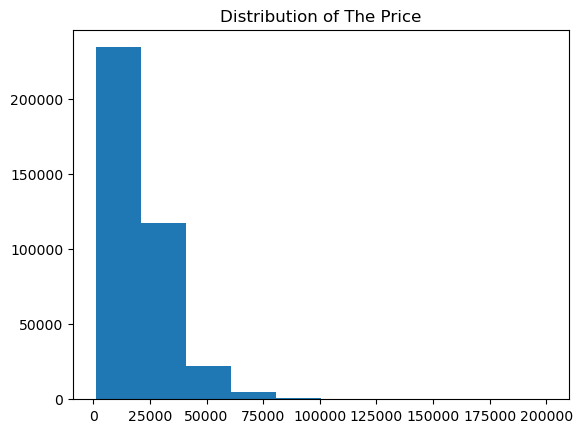

In [14]:
plt.hist(df['price'])
plt.title("Distribution of The Price");

In [15]:
# only price and state columns have value, value of the others are missing
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe

df[df.isna().any(axis=1)].head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [16]:
# drop row that most of columns are NaN 
# https://stackoverflow.com/questions/39128856/python-drop-row-if-two-columns-are-nan

df.dropna(subset=['manufacturer','model','cylinders','size'], how="all", inplace=True)

In [17]:
df.isnull().mean()

price           0.000000
year            0.002905
manufacturer    0.039610
model           0.011562
condition       0.376762
cylinders       0.407965
fuel            0.006656
odometer        0.005308
title_status    0.017086
transmission    0.004611
drive           0.302725
size            0.717817
type            0.213281
paint_color     0.285898
state           0.000000
dtype: float64

In [18]:
# check if data have duplicate

df[df.duplicated()==True].head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
188,39590.0,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
221,33590.0,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
230,27990.0,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,NaN,pickup,black,al
251,29990.0,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,NaN,pickup,red,al
284,27990.0,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,NaN,NaN,pickup,red,al


In [19]:
# drop duplicate

df.drop_duplicates(inplace=True)

In [20]:
df.shape

(270618, 15)

In [86]:
# year vs price

df['year'].sort_values().unique()

array([1900., 1905., 1913., 1915., 1916., 1918., 1921., 1922., 1923.,
       1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932.,
       1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
       1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950.,
       1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022.,
         nan])

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


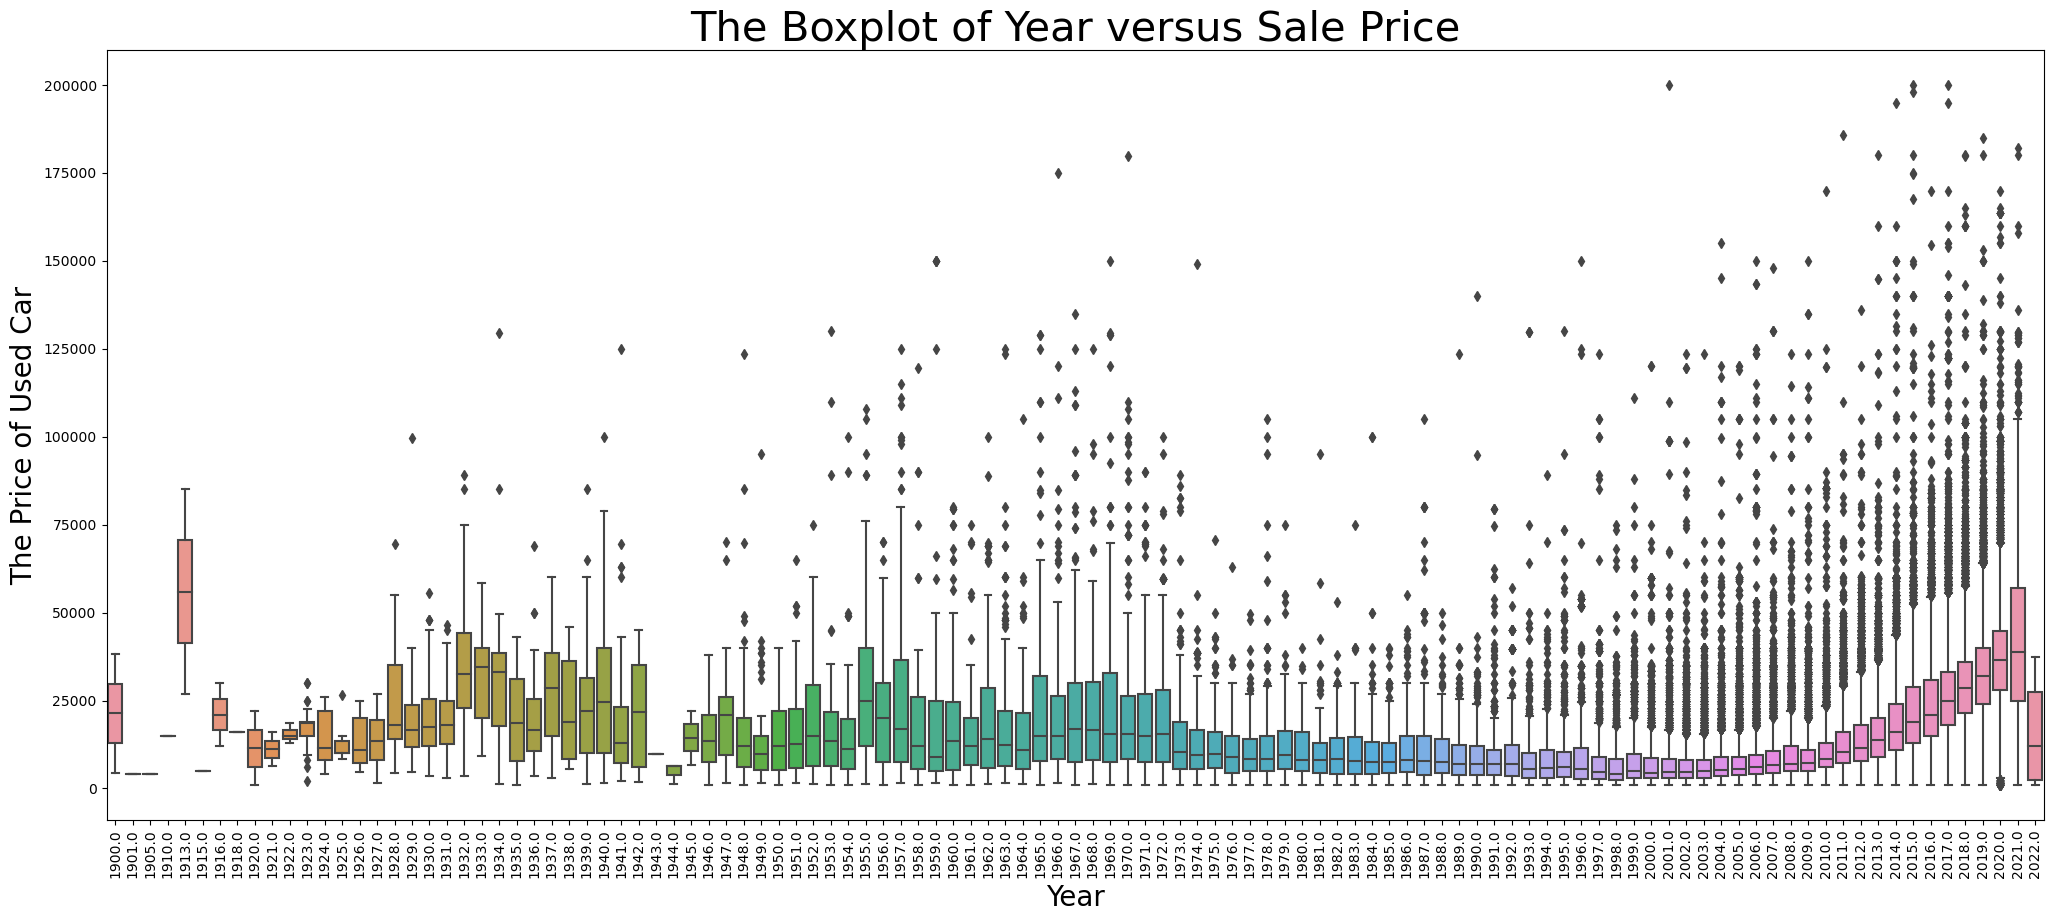

In [22]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='year', y='price')
plt.xlabel("Year", size=20)
plt.ylabel("The Price of Used Car", size=20)
plt.title("The Boxplot of Year versus Sale Price", size=30);

In [23]:
# aggregate count, mean, median of price by year

df_year_price = df.groupby('year')['price'].agg(['count','mean','median'])

In [24]:
df_year_price.sort_values(by='count', ascending=False).head()

,count,mean,median
year,,,
2018.0,20922,30186.140713,28590.0
2017.0,19606,27491.546516,25000.0
2013.0,18466,15885.601809,13900.0
2015.0,17997,21936.818025,18990.0
2014.0,17474,18707.623097,15995.0


In [25]:
df_year_price.sort_values(by='count').head()

,count,mean,median
year,,,
1901.0,1,4000.0,4000.0
1905.0,1,3990.0,3990.0
1943.0,1,9750.0,9750.0
1915.0,1,5000.0,5000.0
1918.0,1,16000.0,16000.0


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


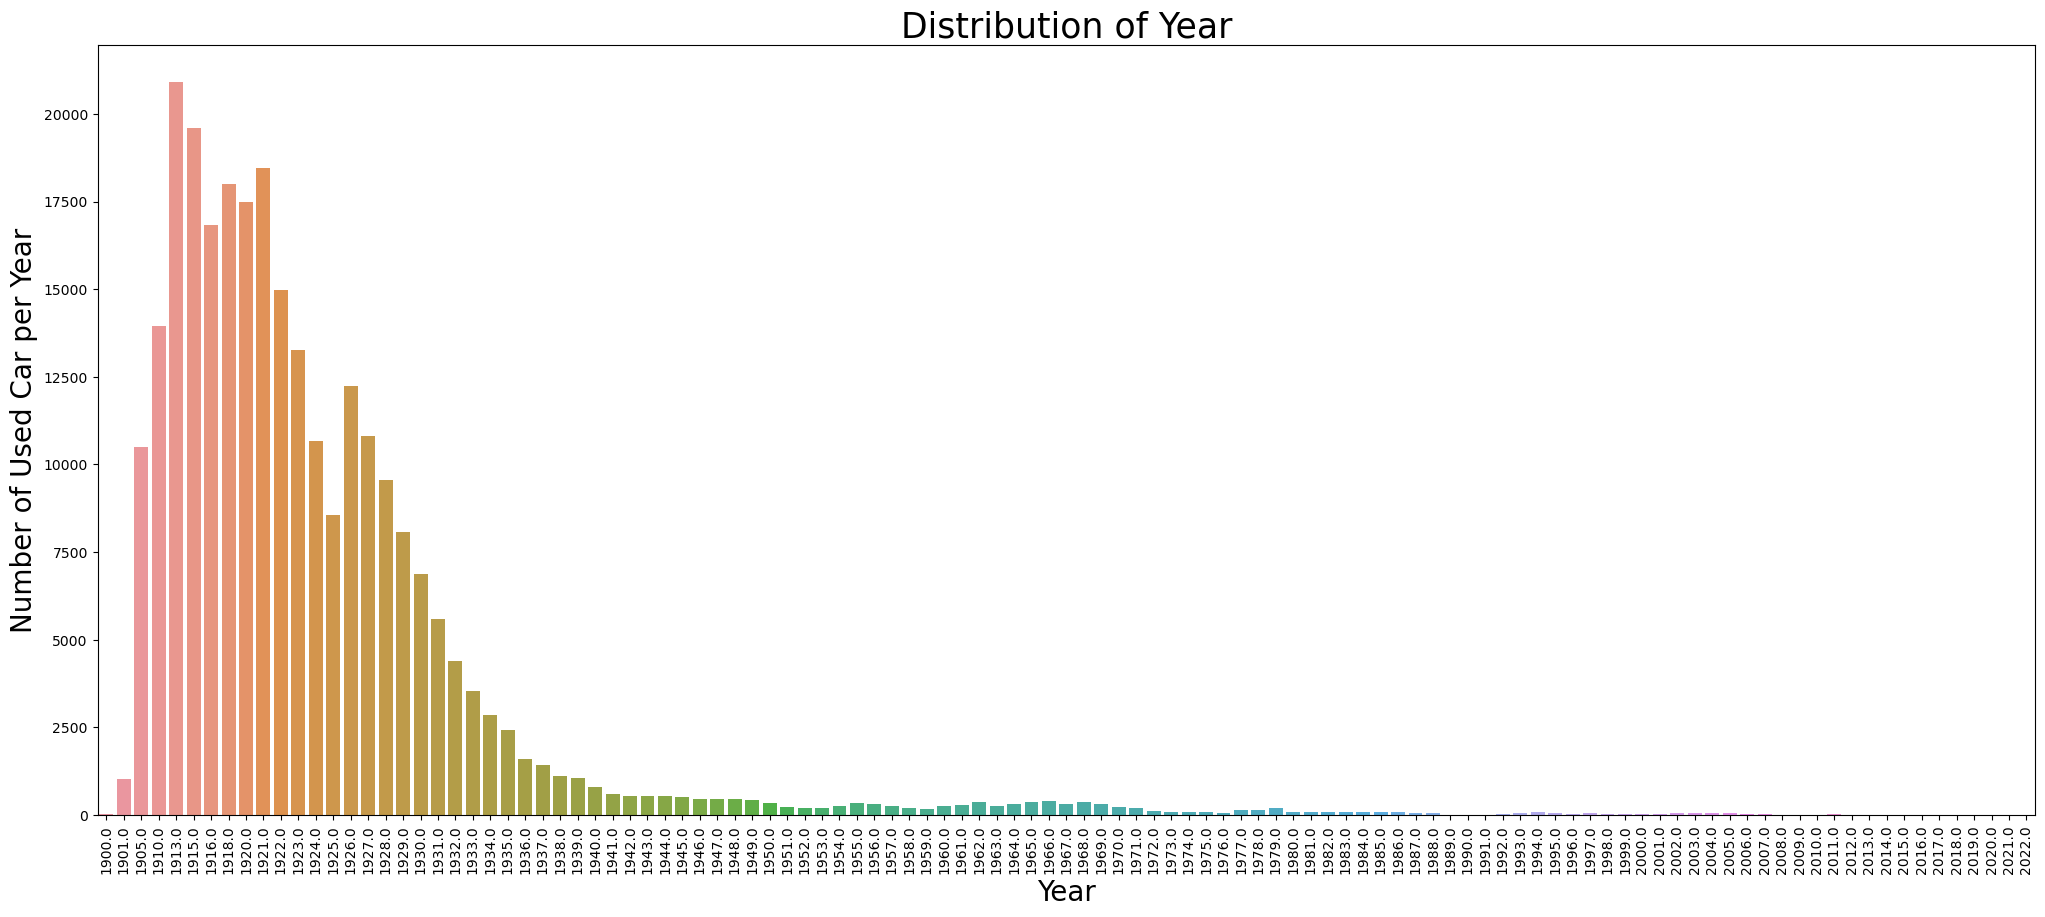

In [26]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.barplot(data = df_year_price, x=df_year_price.index.sort_values(ascending=False), y='count')
plt.xlabel('Year', size=20)
plt.ylabel("Number of Used Car per Year", size=20)
plt.title('Distribution of Year', size=25);

In [27]:
df_year_price.sort_values(by='mean', ascending=False).head()

,count,mean,median
year,,,
1913.0,2,56000.000000,56000.0
2021.0,1029,45225.210884,38930.0
2020.0,10506,38675.996097,36590.0
1932.0,51,35312.098039,32500.0
2019.0,13943,34087.914222,31988.0


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

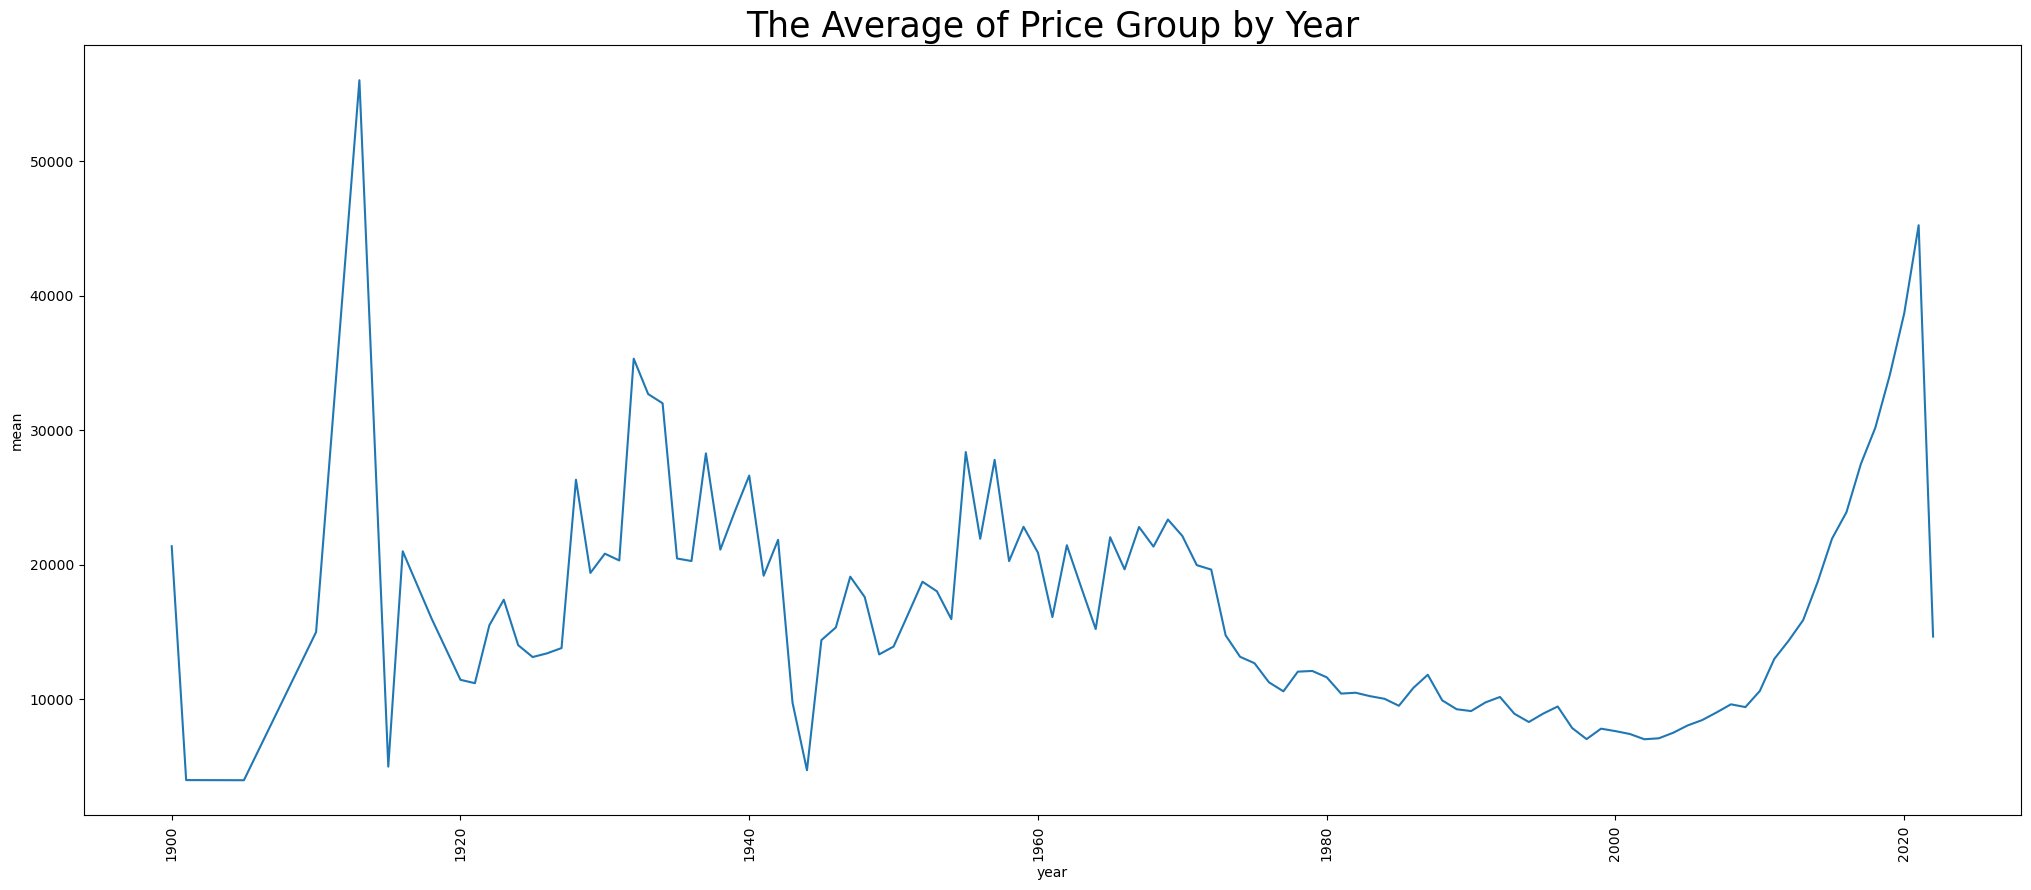

In [28]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.lineplot(data = df_year_price, x=df_year_price.index, y='mean')
plt.title('The Average of Price Group by Year', size=25);

In [29]:
# 1913 has the highest average price of used car, 1913 has only two cars

df[df['year']==1913]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
54732,85000.0,1913.0,cadillac,touring car,good,4 cylinders,gas,150.0,clean,manual,rwd,full-size,convertible,black,ca
317864,27000.0,1913.0,ford,"""t""",like new,4 cylinders,gas,9999999.0,clean,other,rwd,compact,convertible,red,or


In [30]:
# df.sort_values('price',ascending=False).head(10)

In [31]:
# manufacturer vs price 

df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', nan, 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari',
       'mini', 'pontiac', 'fiat', 'tesla', 'mercury', 'saturn',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover',
       'morgan'], dtype=object)

In [32]:
# rover is the same as land rover, replace rover as land rover

df['manufacturer'].replace('rover', 'land rover', inplace=True)

In [33]:
df[df['manufacturer']=='rover']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state


In [34]:
df['manufacturer'].isnull().sum()

11678

In [35]:
df[df['manufacturer'].isna()].head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
97,15990.0,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,fwd,NaN,hatchback,blue,al
122,6800.0,2005.0,NaN,blue bird bus,excellent,6 cylinders,diesel,180000.0,clean,automatic,rwd,full-size,bus,yellow,al
135,14990.0,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,65203.0,clean,other,fwd,NaN,hatchback,red,al
137,2500.0,1966.0,NaN,1966 C-30 1 ton,good,6 cylinders,gas,47000.0,clean,manual,rwd,full-size,pickup,brown,al
155,8990.0,2013.0,NaN,smart fortwo Passion Hatchback,good,NaN,gas,59072.0,clean,automatic,rwd,NaN,coupe,silver,al


In [36]:
# aggregate count, mean, median of price by manufacturer

df_facturer_price = df.groupby('manufacturer')['price'].agg(['count','mean','median'])

In [37]:
df_facturer_price.sort_values(by='mean',ascending=False).head()

,count,mean,median
manufacturer,,,
ferrari,53,97416.679245,98900.0
aston-martin,18,71001.555556,69470.0
tesla,490,42778.944898,38926.0
porsche,933,34573.976420,30000.0
land rover,1435,29506.910105,26700.0


In [38]:
df_facturer_price.sort_values(by='count',ascending=False).head()

,count,mean,median
manufacturer,,,
ford,44177,19991.077054,15900.0
chevrolet,34447,19006.780620,14900.0
toyota,22150,15916.129255,12000.0
honda,14714,11329.528069,8950.0
nissan,12327,12543.386225,9990.0


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf valu

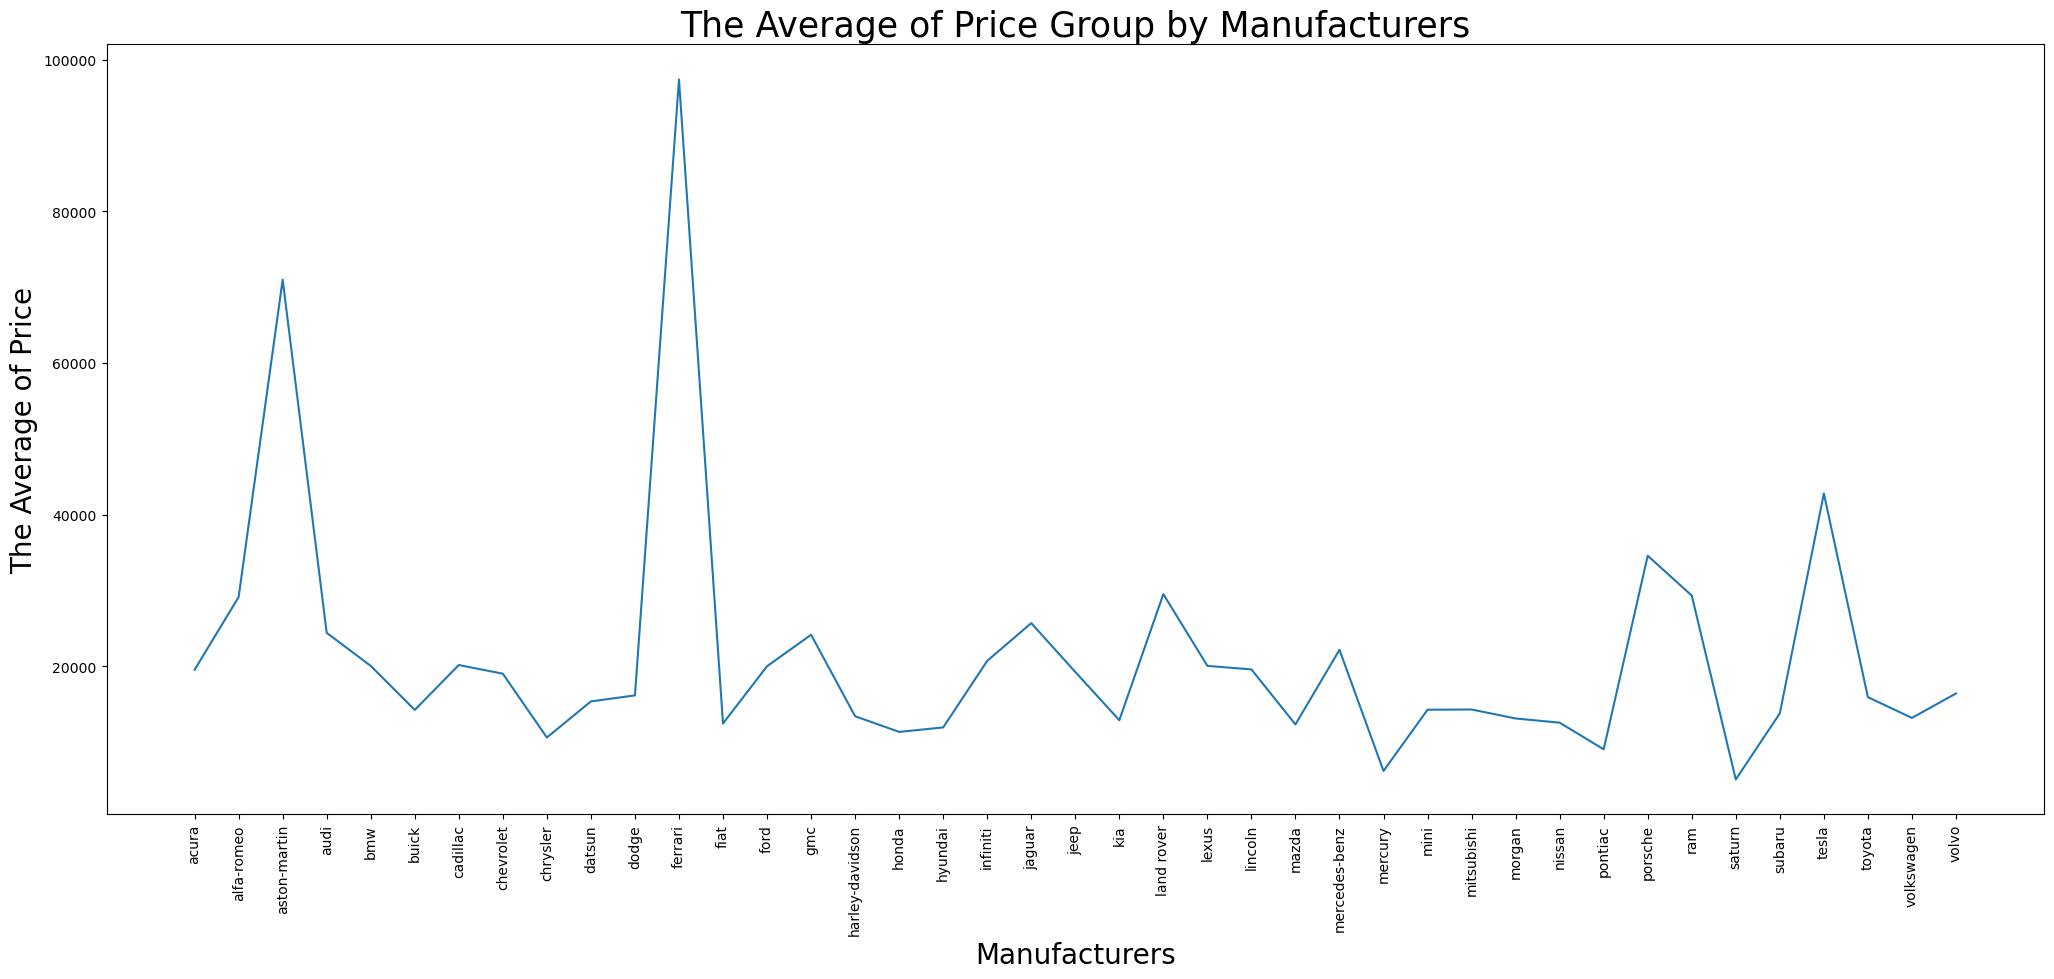

In [39]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.lineplot(data = df_facturer_price, x=df_facturer_price.index, y='mean')
plt.ylabel("The Average of Price", size=20)
plt.xlabel("Manufacturers", size=20)
plt.title('The Average of Price Group by Manufacturers', size=25);

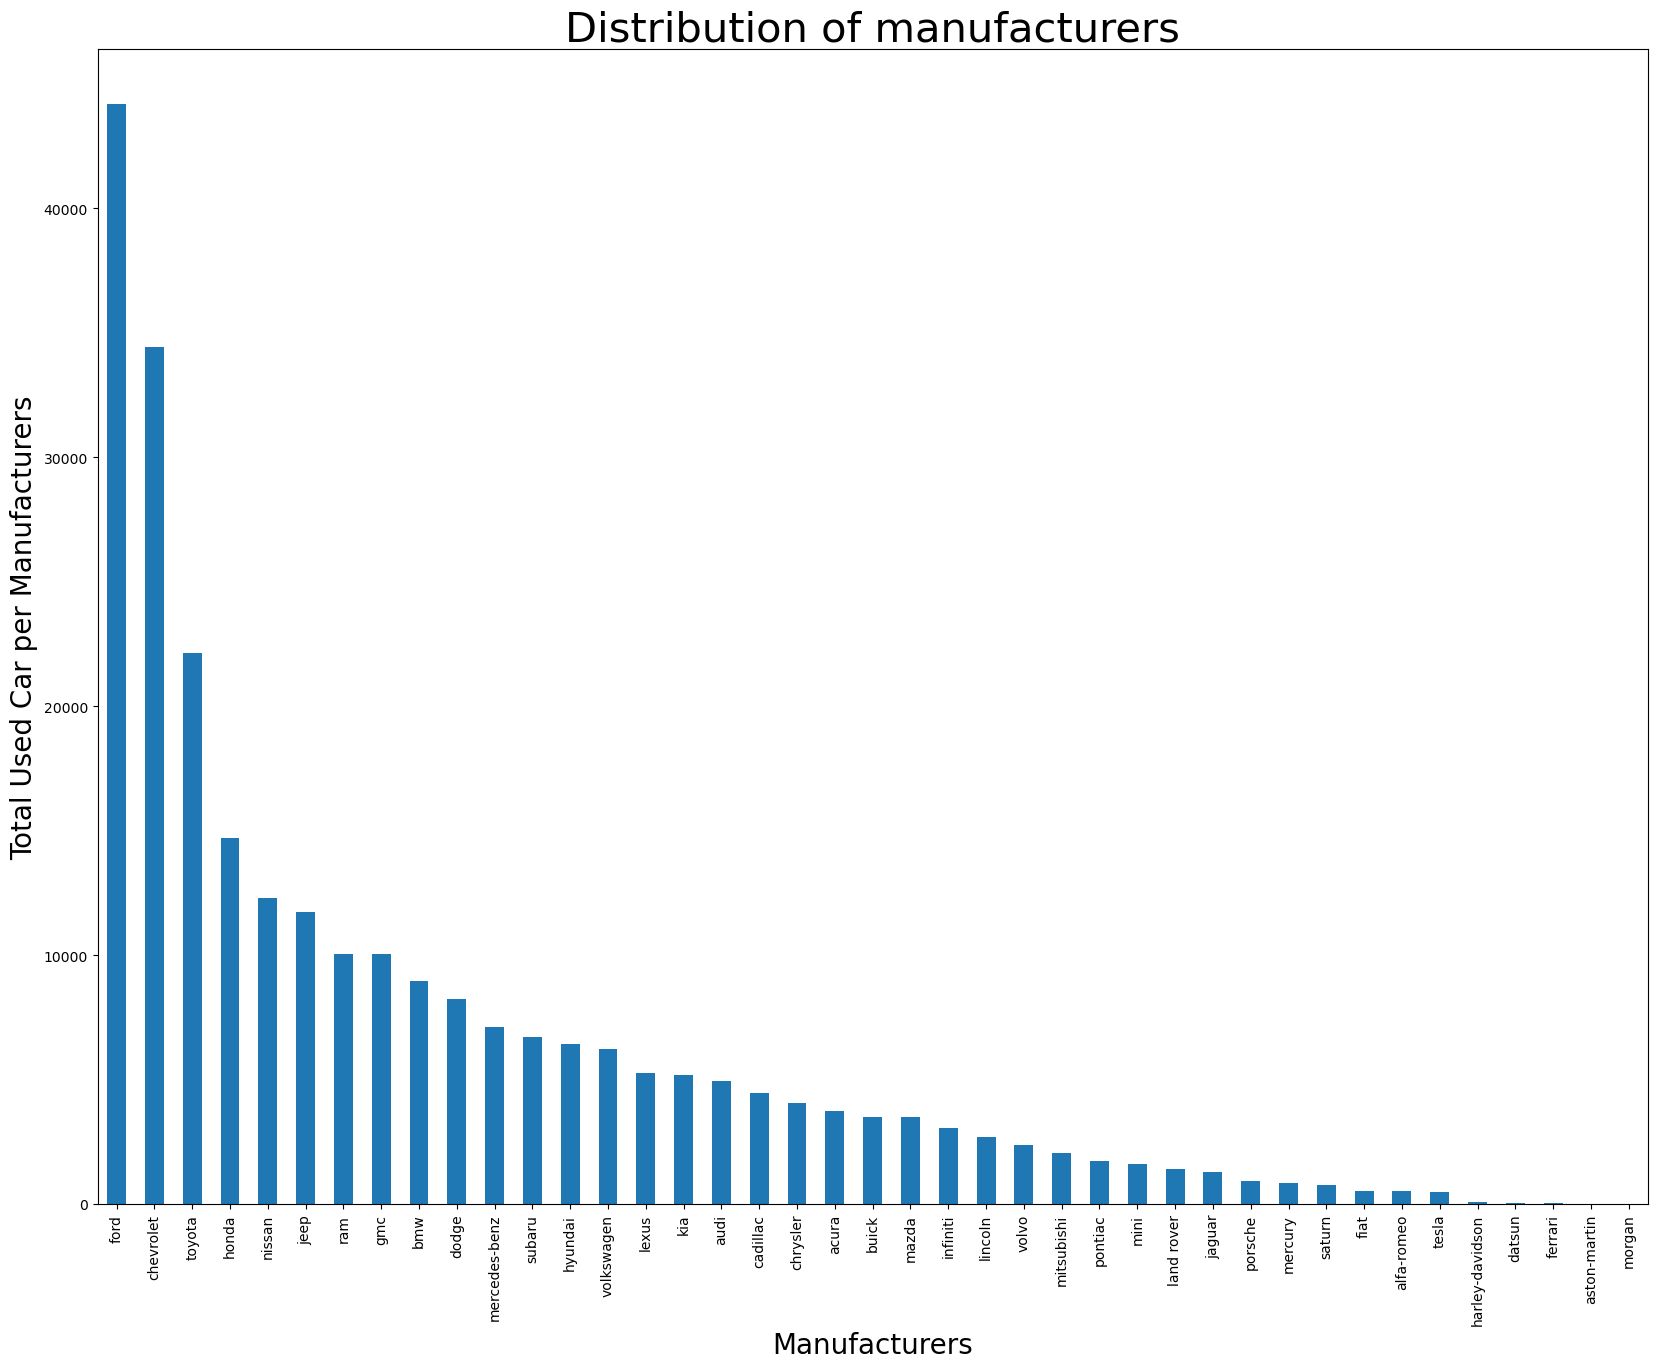

In [40]:
# the distribution of manufacturers
plt.figure(figsize=(20,15))
df.manufacturer.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Used Car per Manufacturers', size=20)
plt.xlabel("Manufacturers", size=20)
plt.title('Distribution of manufacturers', size=30);

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


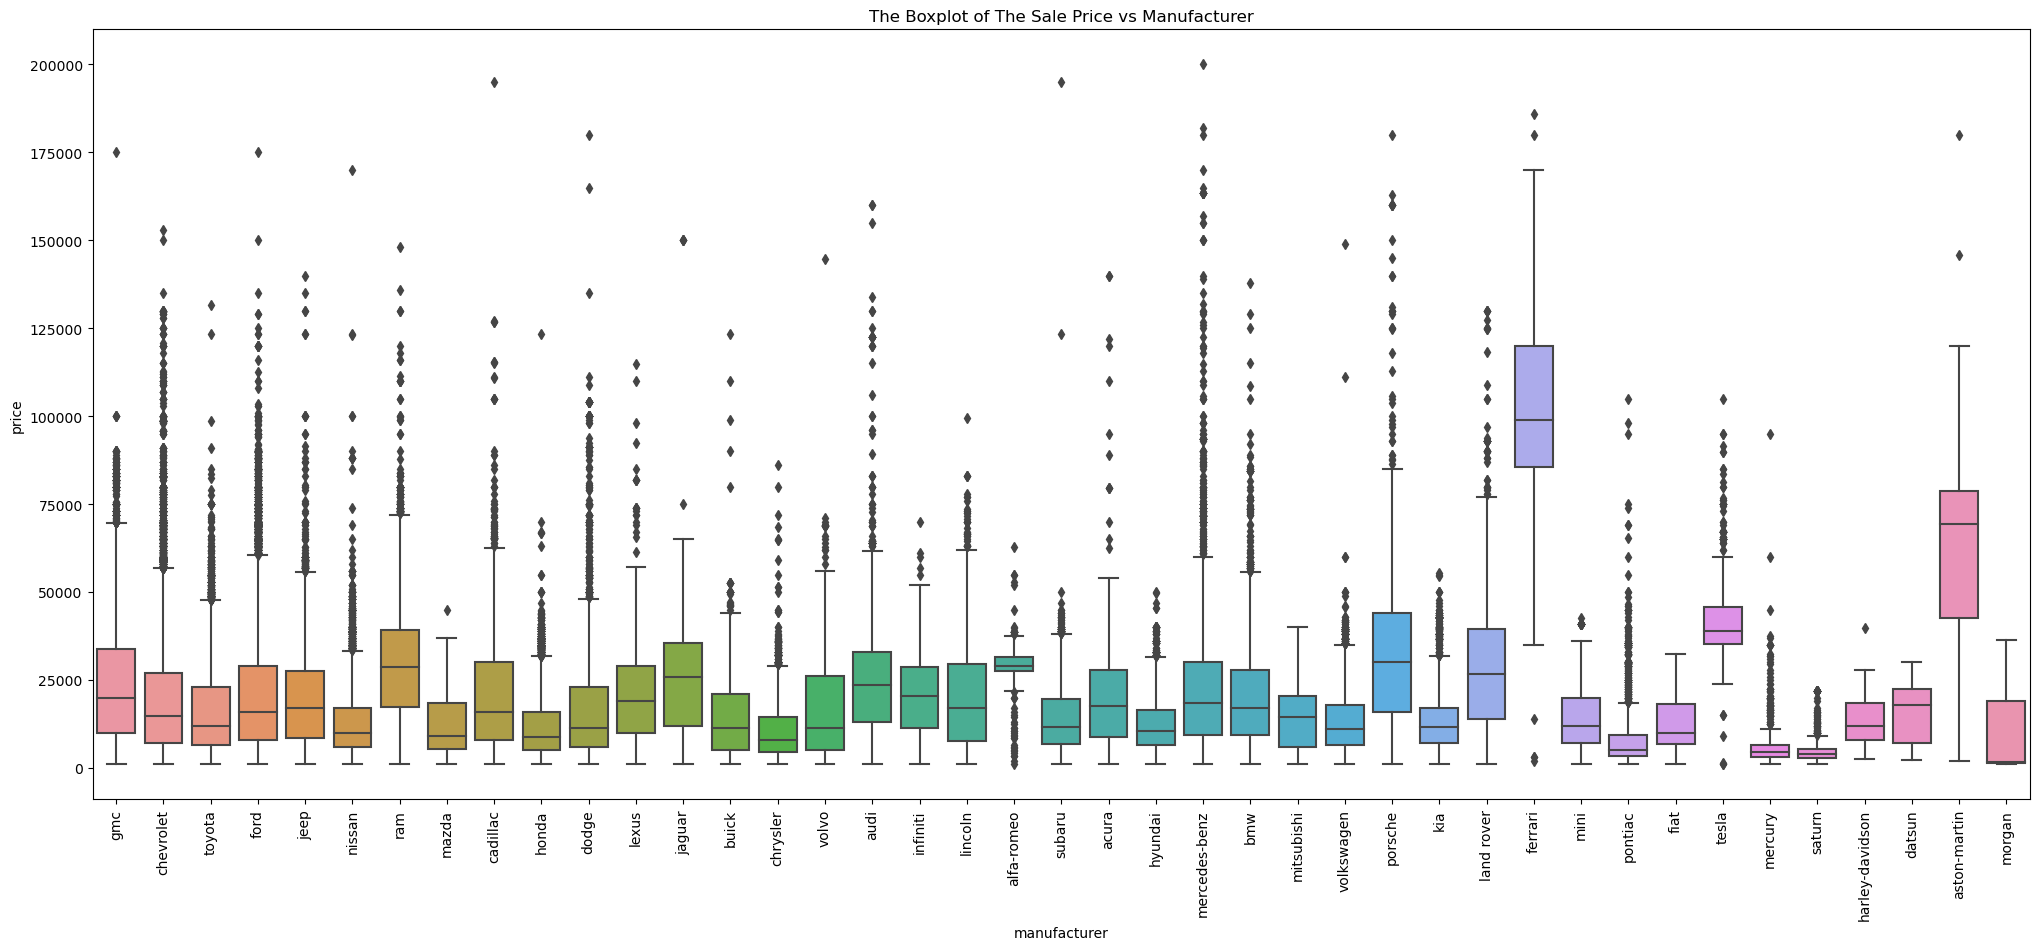

In [41]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='manufacturer', y='price')
plt.title("The Boxplot of The Sale Price vs Manufacturer");

In [42]:
# model vs price

df['model'].nunique()

27219

In [43]:
# manufacturer and model are related, keep manufacturer and drop model
# drop the na of the manufacturer column and drop model column 
# model column would be an interesting column to include for future. 

df.dropna(subset='manufacturer', inplace=True)
df.drop(columns='model',inplace=True)

In [44]:
df.shape

(258940, 14)

In [45]:
# condition vs price

df['condition'].unique()

array(['good', 'excellent', 'fair', nan, 'like new', 'new', 'salvage'],
      dtype=object)

In [46]:
# 34882 used cars are less than 10000

df.loc[(df['condition'].isna())&(df['price']<10000)]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
187,4500.0,2008.0,ford,NaN,6 cylinders,gas,187016.0,clean,automatic,rwd,NaN,coupe,red,al
190,4299.0,2007.0,nissan,NaN,4 cylinders,gas,189321.0,clean,automatic,fwd,NaN,sedan,silver,al
207,3750.0,1997.0,ford,NaN,NaN,gas,150000.0,clean,automatic,NaN,NaN,NaN,NaN,al
208,2500.0,1976.0,chevrolet,NaN,NaN,gas,100.0,clean,automatic,NaN,NaN,NaN,NaN,al
210,1300.0,1969.0,mercedes-benz,NaN,NaN,gas,12774.0,clean,automatic,NaN,NaN,NaN,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426848,4277.0,2005.0,honda,NaN,NaN,gas,236787.0,clean,automatic,NaN,NaN,coupe,NaN,wy
426851,6577.0,2013.0,hyundai,NaN,NaN,gas,169396.0,clean,manual,NaN,NaN,sedan,blue,wy
426852,6977.0,2011.0,honda,NaN,NaN,gas,112396.0,clean,automatic,NaN,NaN,sedan,white,wy
426853,4977.0,2005.0,nissan,NaN,NaN,gas,154917.0,clean,automatic,NaN,NaN,sedan,NaN,wy


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


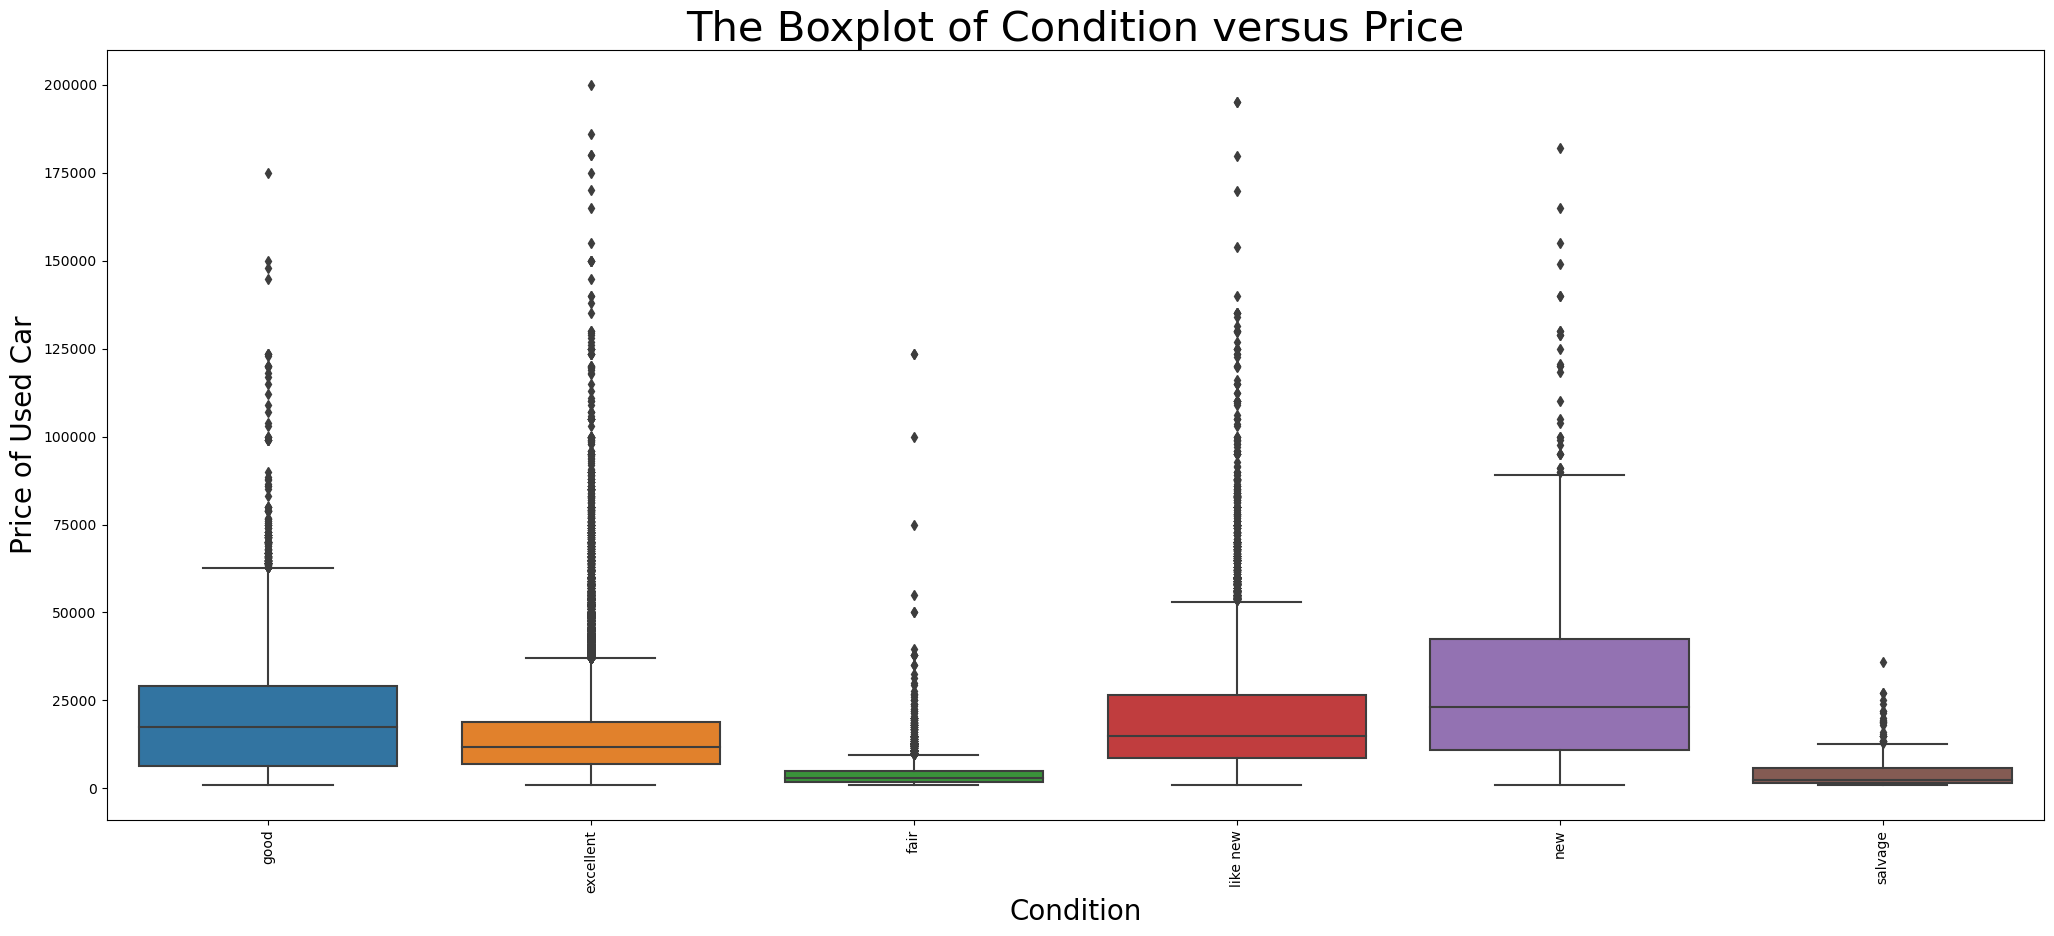

In [47]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='condition', y='price')
plt.xlabel("Condition", size=20)
plt.ylabel("Price of Used Car", size=20)
plt.title("The Boxplot of Condition versus Price", size=30);

In [48]:
df_condition_price = df.groupby('condition')['price'].agg(['count','mean','median'])

In [49]:
df_condition_price.sort_values('mean')

,count,mean,median
condition,,,
fair,5405,4158.329140,3000.0
salvage,395,4681.979747,2500.0
excellent,66541,15158.012008,11900.0
good,78632,18909.554533,17500.0
like new,15301,19901.689955,15000.0
new,797,30618.767880,23058.0


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


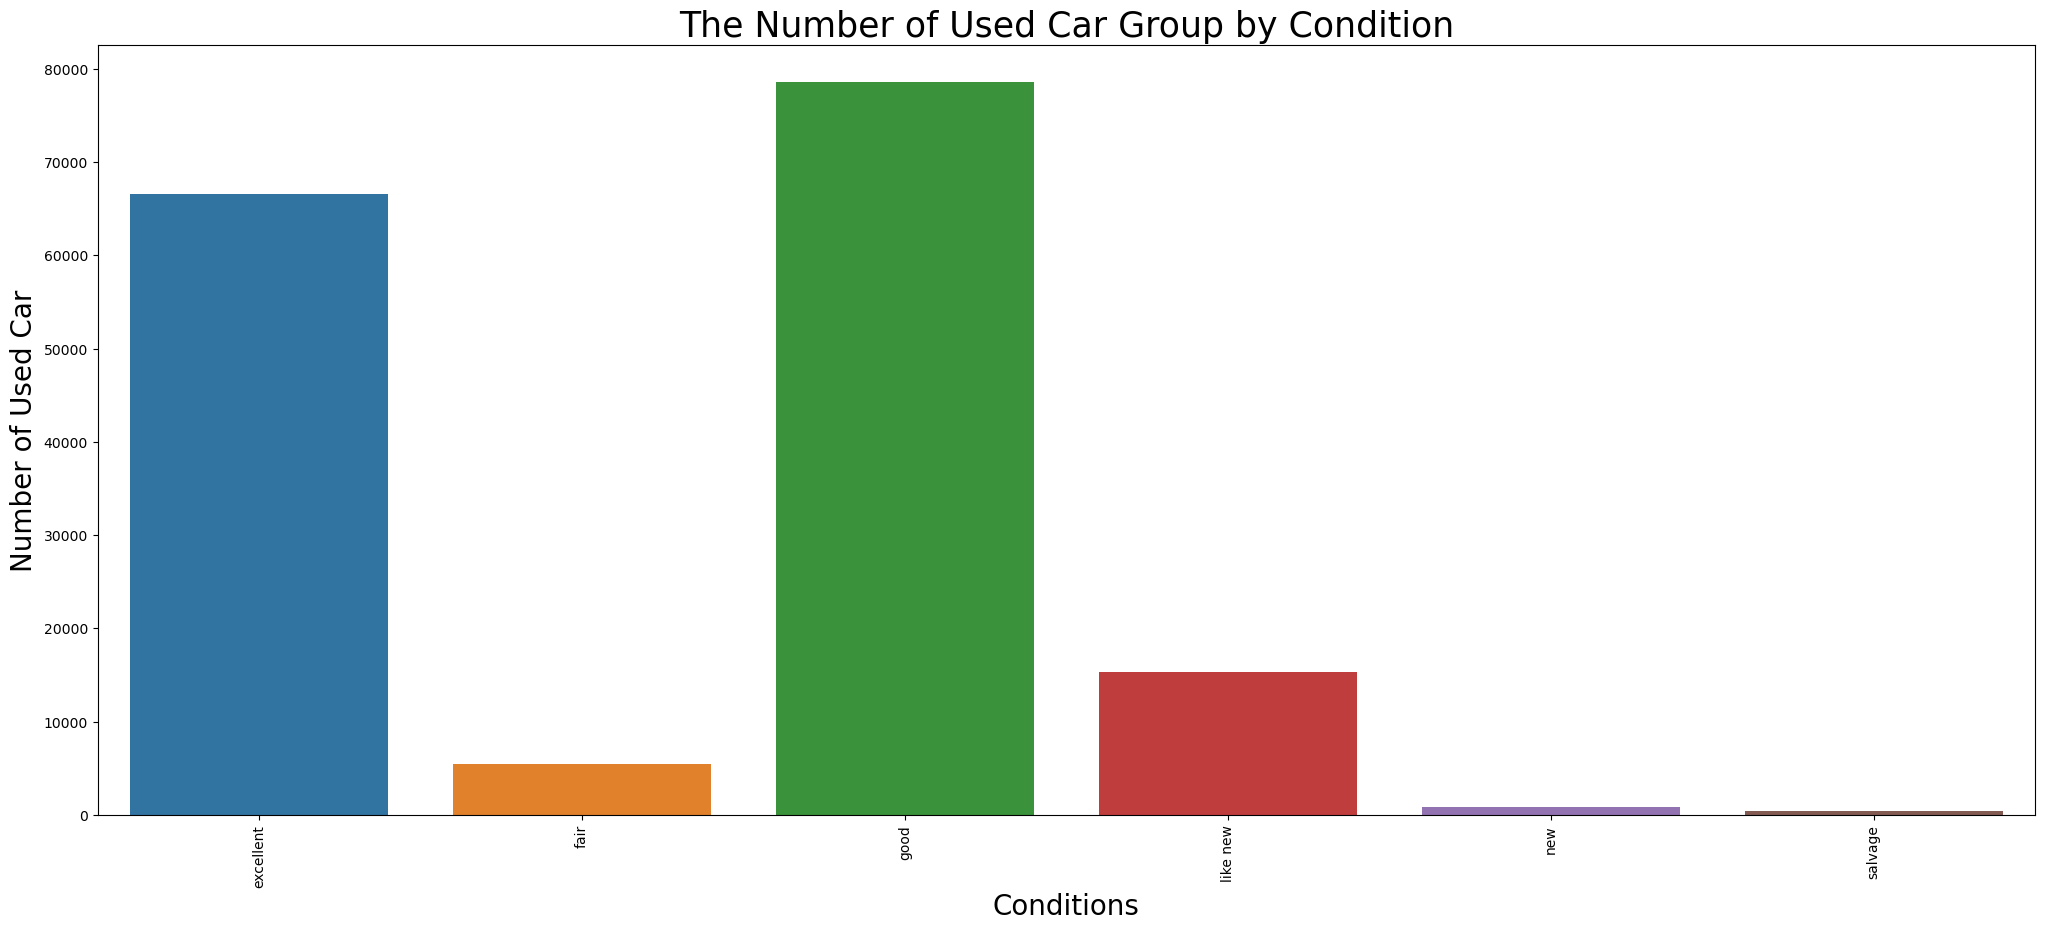

In [50]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.barplot(data = df_condition_price, x=df_condition_price.index, y='count')
plt.ylabel("Number of Used Car", size=20)
plt.xlabel("Conditions", size=20)
plt.title('The Number of Used Car Group by Condition', size=25);

* the average price of used car with good condition is higher than excellent condition
* the largest number of used cars are in good and excellent condition.

In [51]:
# cylinder vs price

df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [52]:
df_cylinders_price = df.groupby('cylinders')['price'].agg(['count','mean','median'])

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


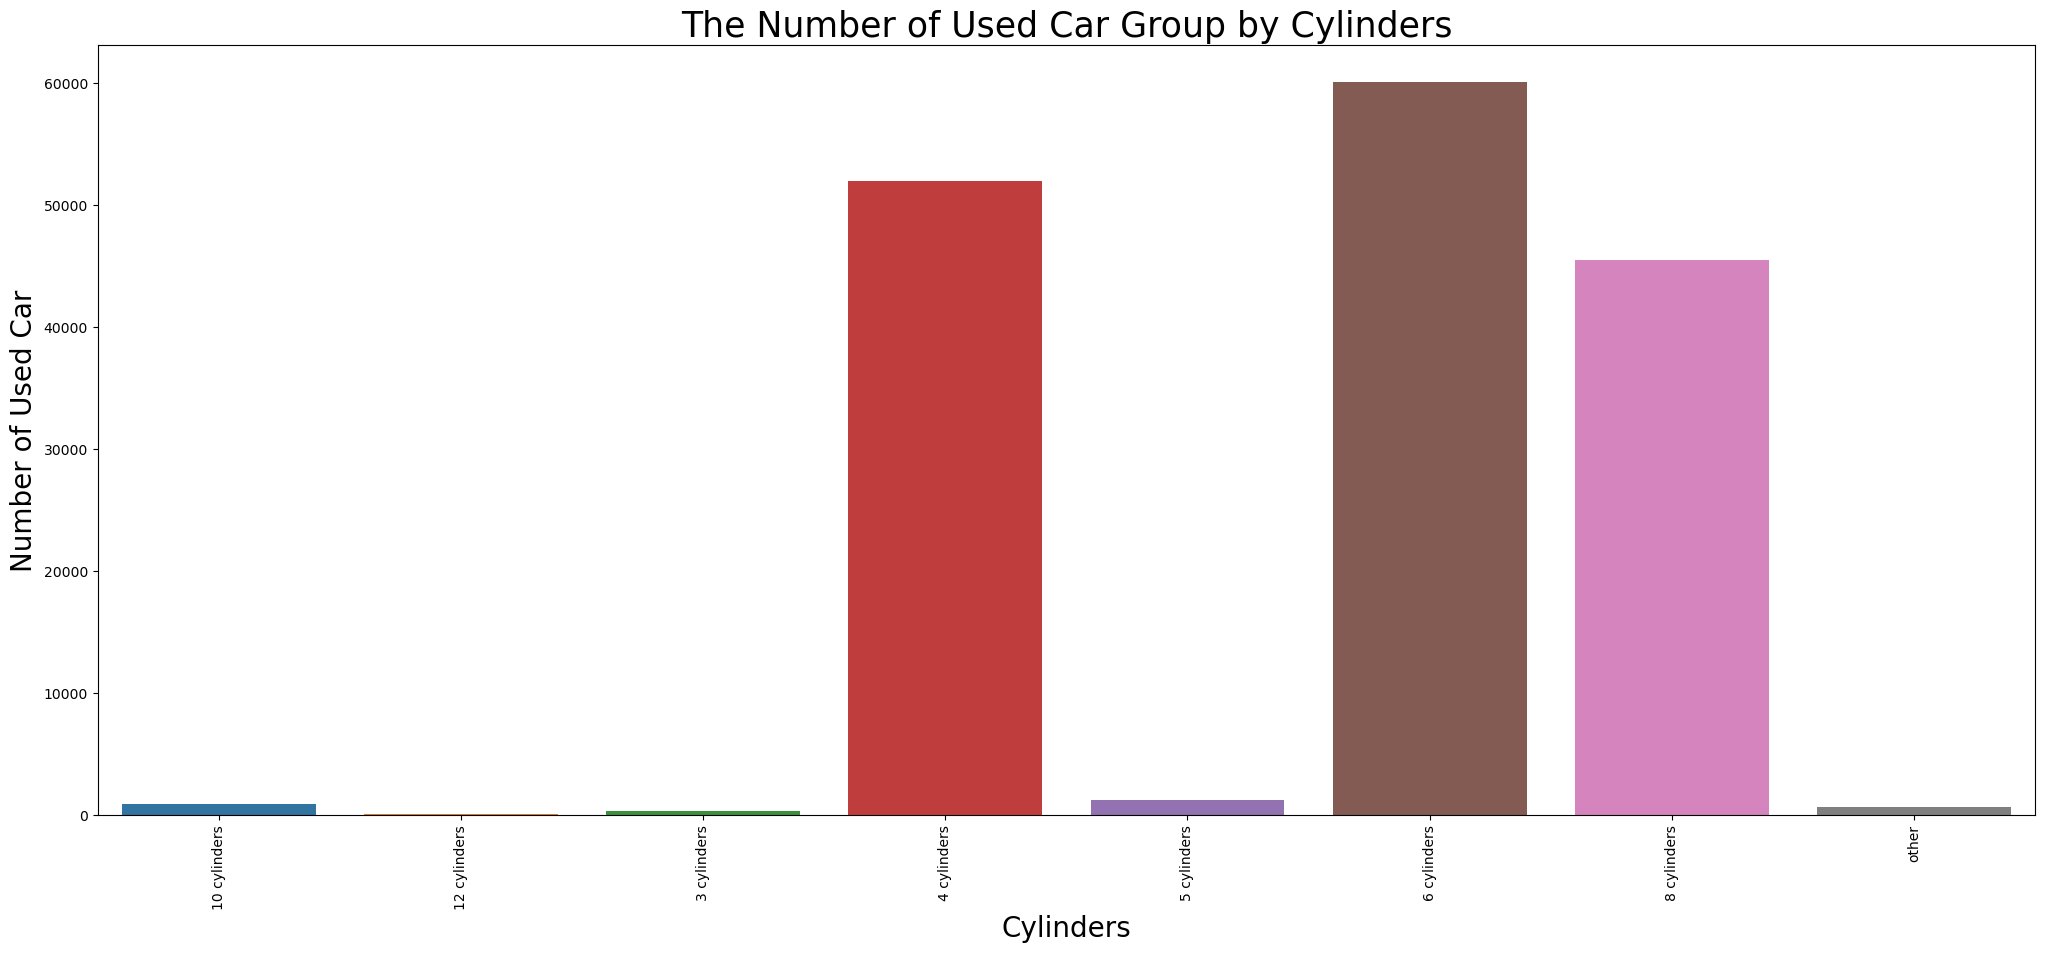

In [53]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.barplot(data = df_cylinders_price, x=df_cylinders_price.index, y='count')
plt.ylabel("Number of Used Car", size=20)
plt.xlabel("Cylinders", size=20)
plt.title('The Number of Used Car Group by Cylinders', size=25);

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


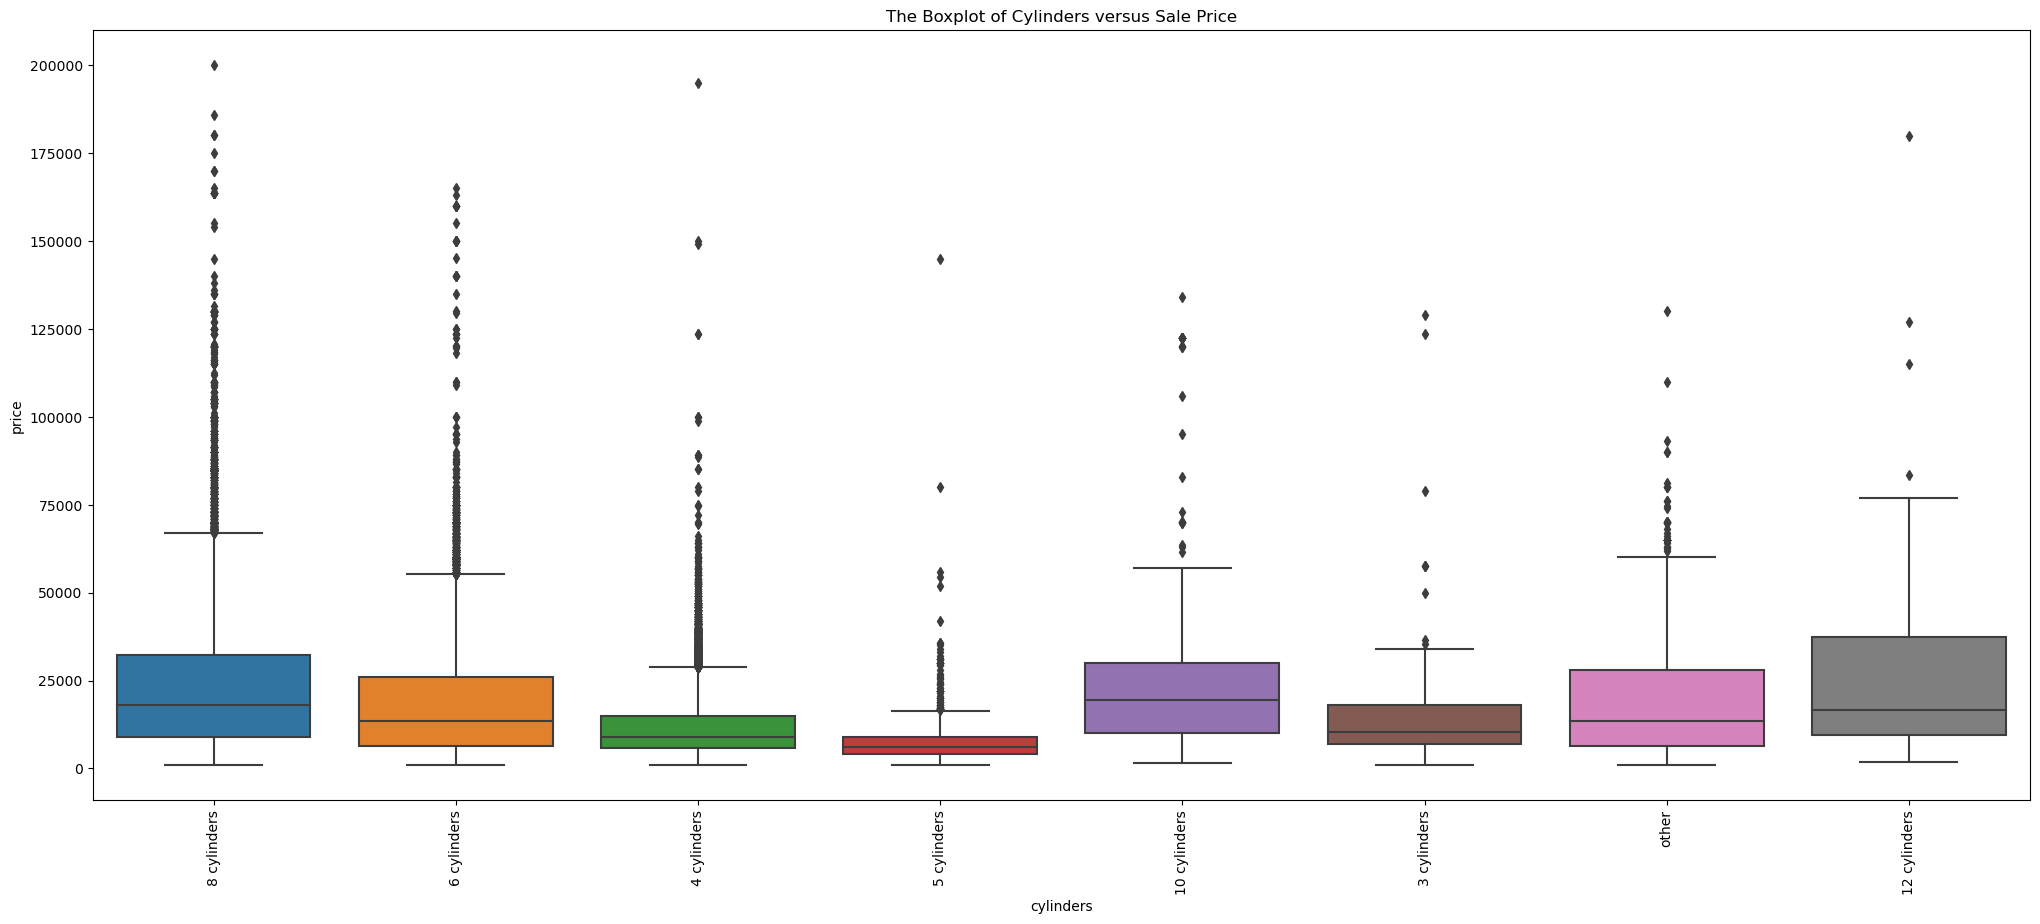

In [54]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='cylinders', y='price')
plt.title("The Boxplot of Cylinders versus Sale Price");

In [55]:
df['cylinders'].mode()

0    6 cylinders
Name: cylinders, dtype: object

In [56]:
# fuel vs Price

df['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [57]:
df_fuel_price = df.groupby('fuel')['price'].agg(['count','mean','median'])

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


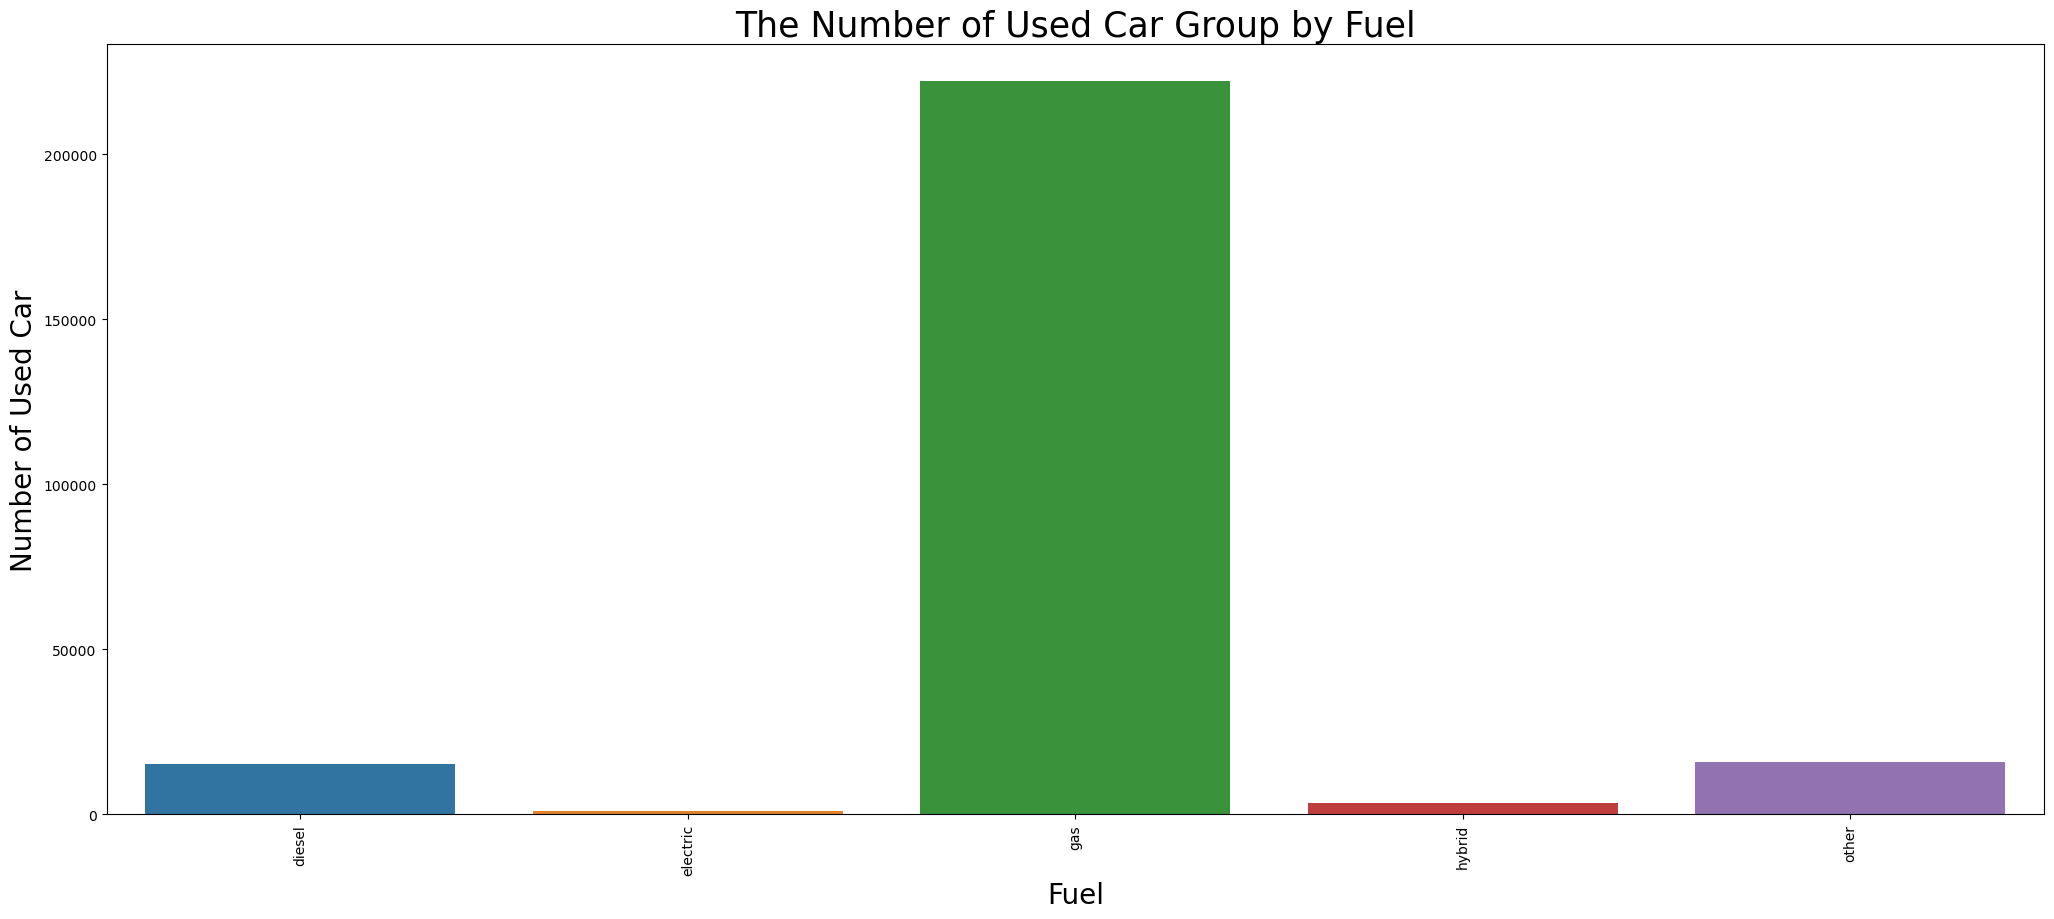

In [58]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.barplot(data = df_fuel_price, x=df_fuel_price.index, y='count')
plt.ylabel("Number of Used Car", size=20)
plt.xlabel("Fuel", size=20)
plt.title('The Number of Used Car Group by Fuel', size=25);

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


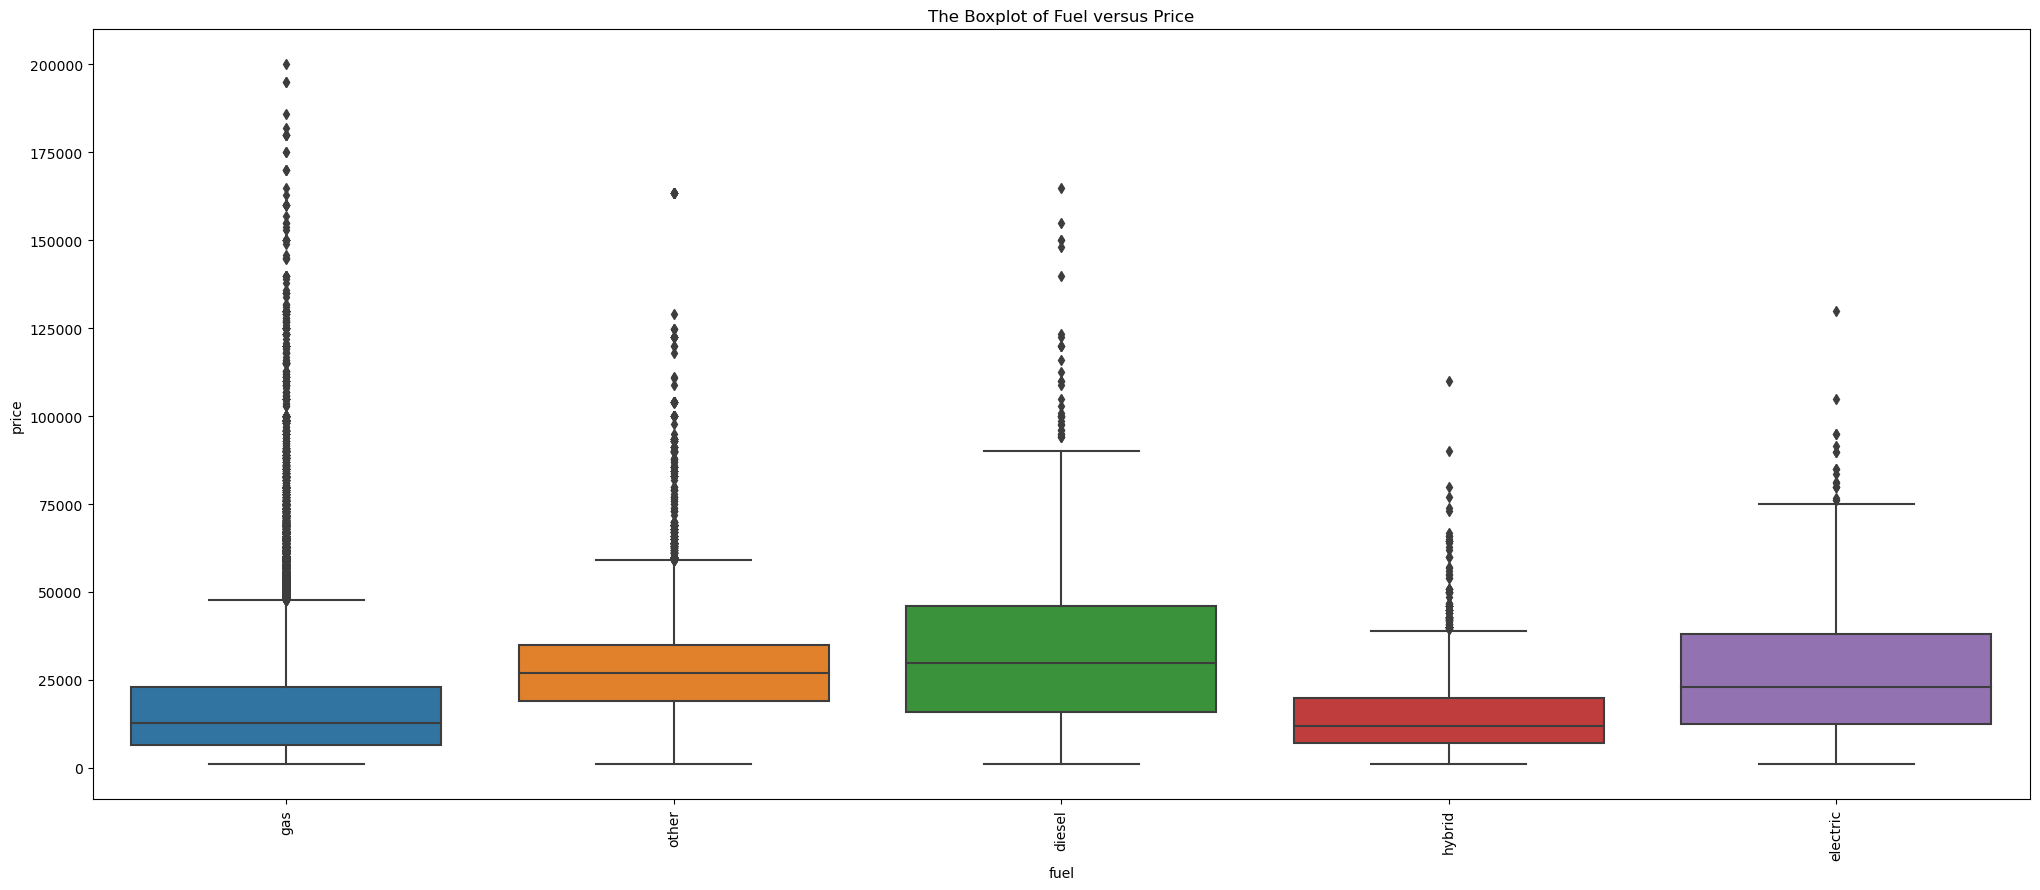

In [59]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='fuel', y='price')
plt.title("The Boxplot of Fuel versus Price");

In [60]:
df["fuel"].mode()

0    gas
Name: fuel, dtype: object

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


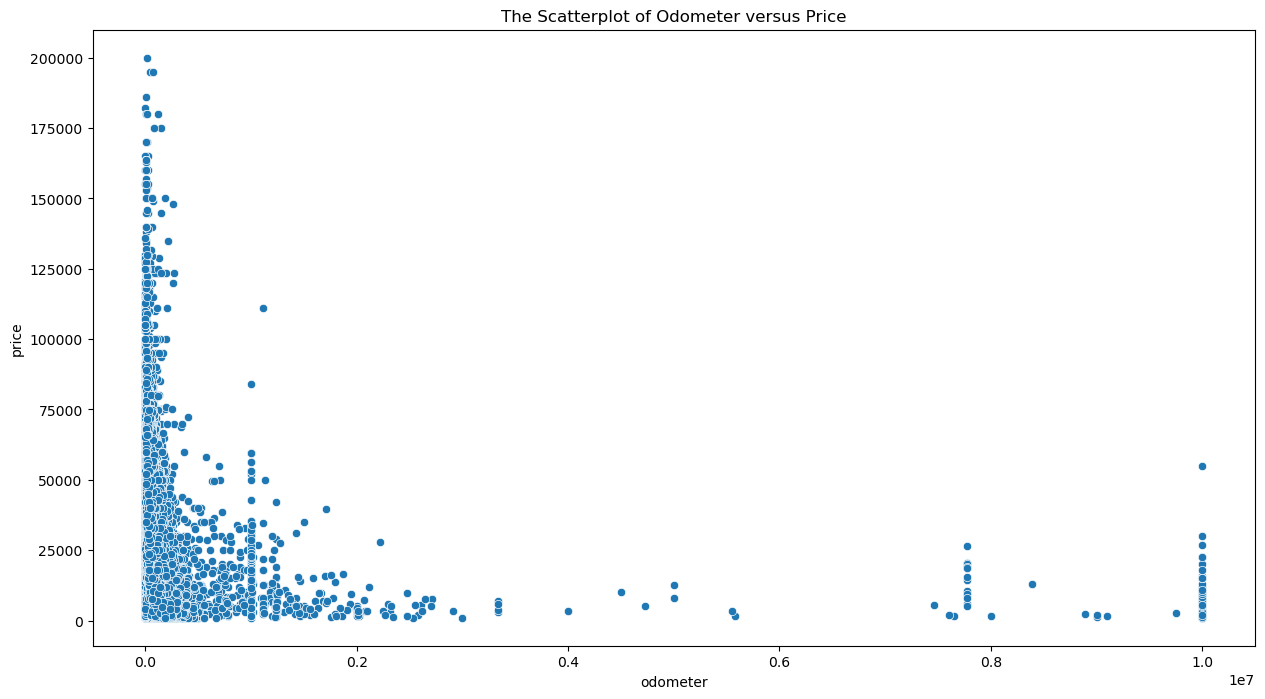

In [61]:
# odometer vs price

plt.figure(figsize=(15,8))
sns.scatterplot(df, x="odometer", y="price")
plt.title("The Scatterplot of Odometer versus Price");

In [62]:
df_condition_odometer = df.groupby('condition')['odometer'].agg(['count','mean','median'])

In [63]:
df_condition_odometer.sort_values('mean')

,count,mean,median
condition,,,
new,797,50155.439147,15000.0
like new,15301,82249.141494,74000.0
good,78480,94228.652039,71500.0
excellent,65970,109060.627937,105284.5
salvage,395,160485.258228,134000.0
fair,5405,216631.337280,167000.0


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


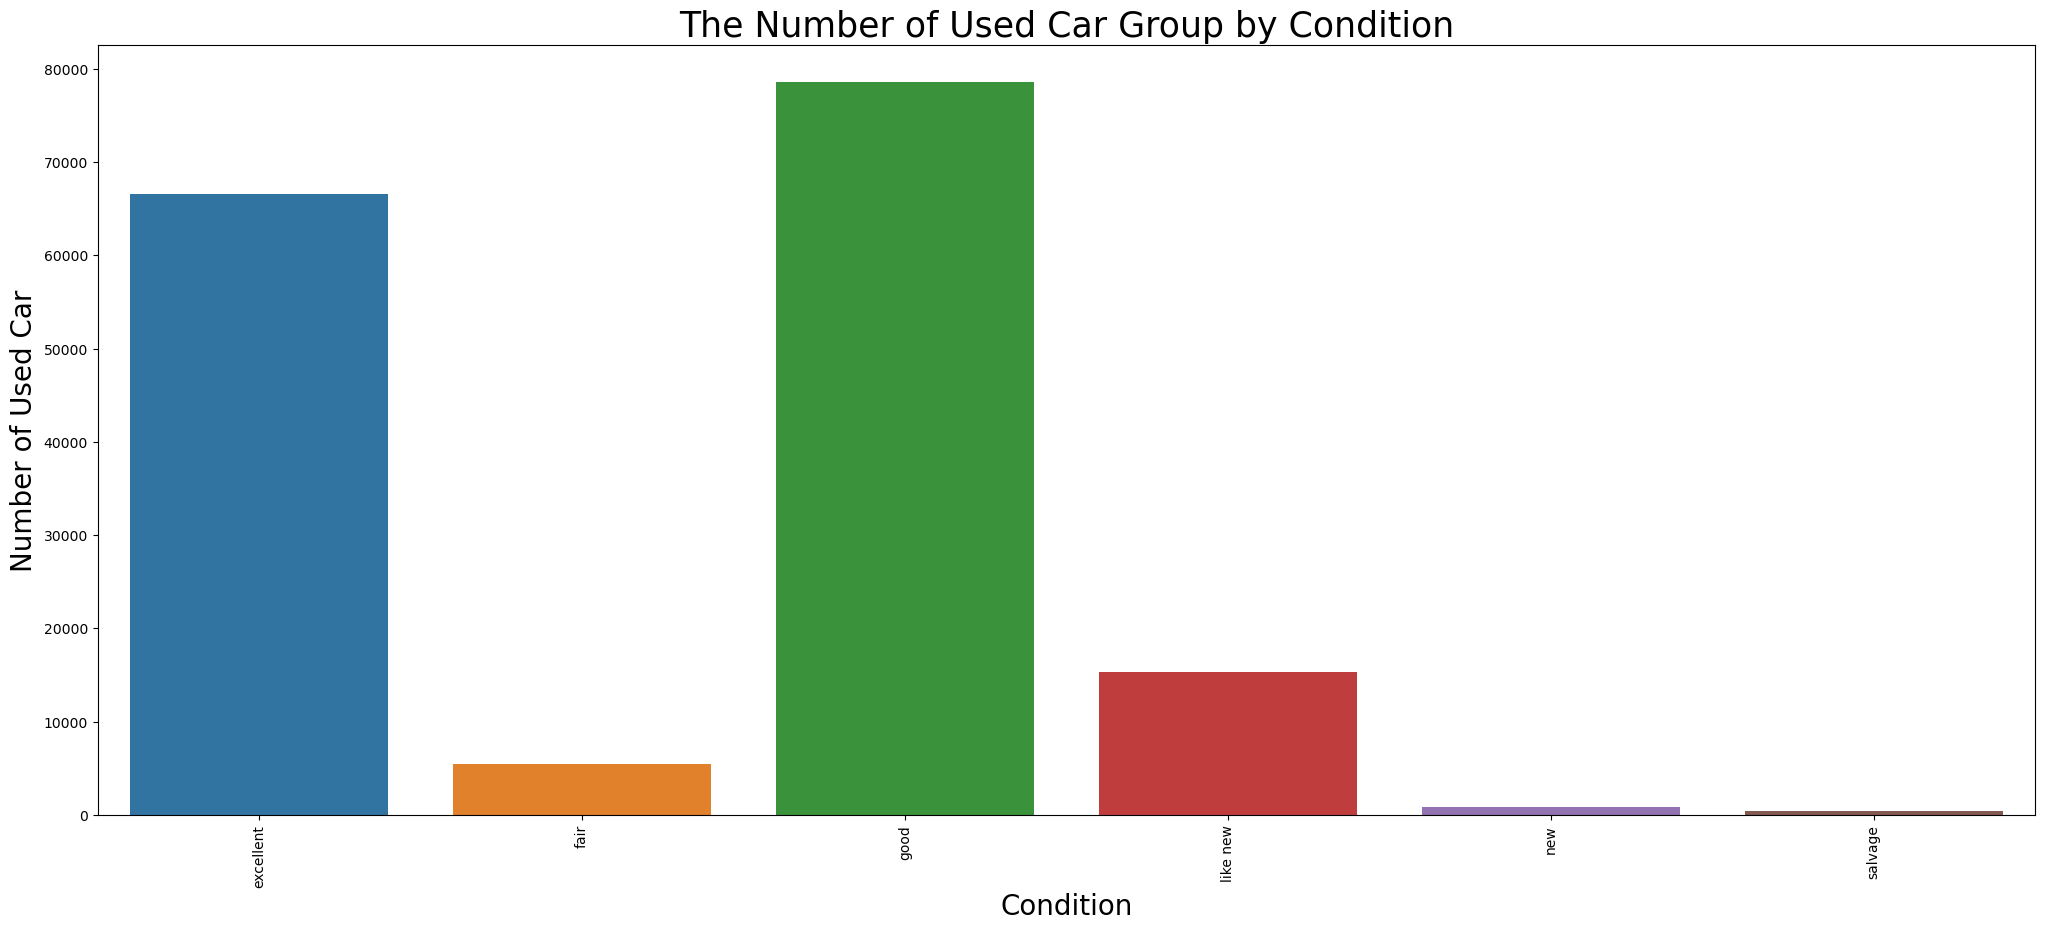

In [64]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.barplot(data = df_condition_price, x=df_condition_price.index, y='count')
plt.ylabel("Number of Used Car", size=20)
plt.xlabel("Condition", size=20)
plt.title('The Number of Used Car Group by Condition', size=25);

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


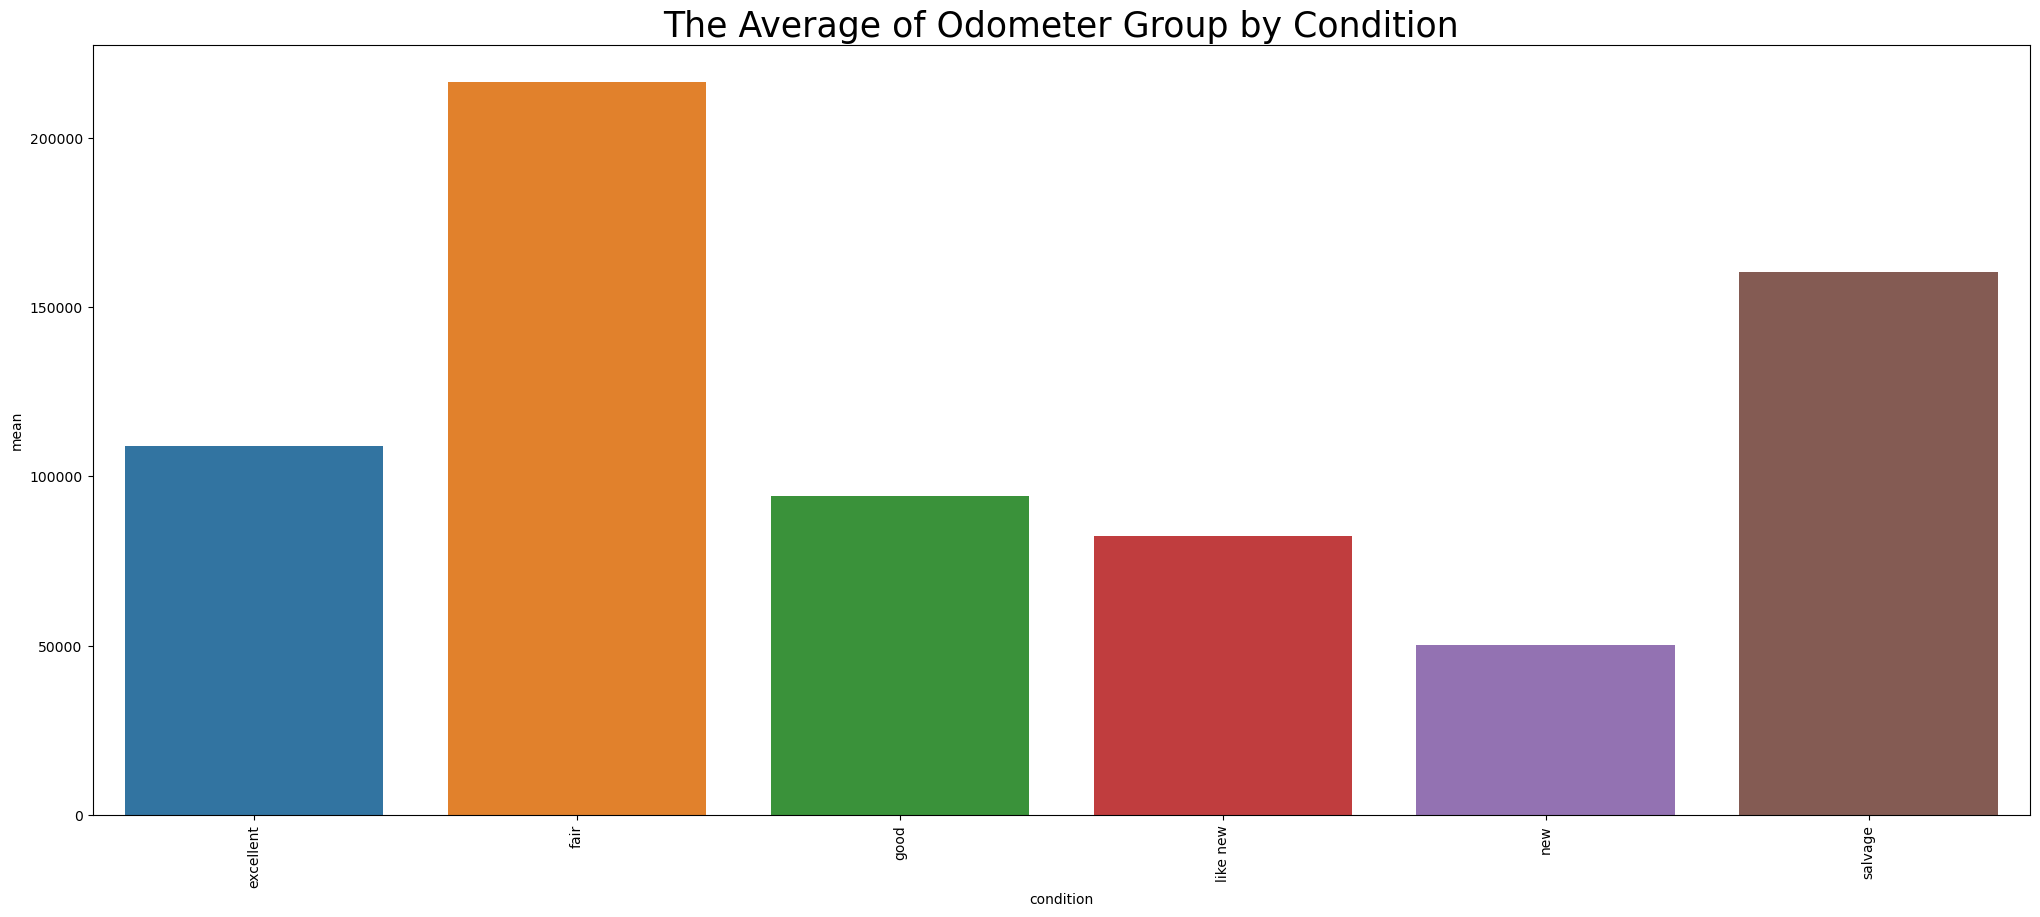

In [65]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.barplot(data = df_condition_odometer, x=df_condition_odometer.index, y='mean')
plt.title('The Average of Odometer Group by Condition', size=25);

* Used car with fair or salvage condition have highest odometer

In [66]:
# title_status vs price

df['title_status'].unique()

array(['clean', 'rebuilt', 'lien', nan, 'salvage', 'missing',
       'parts only'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


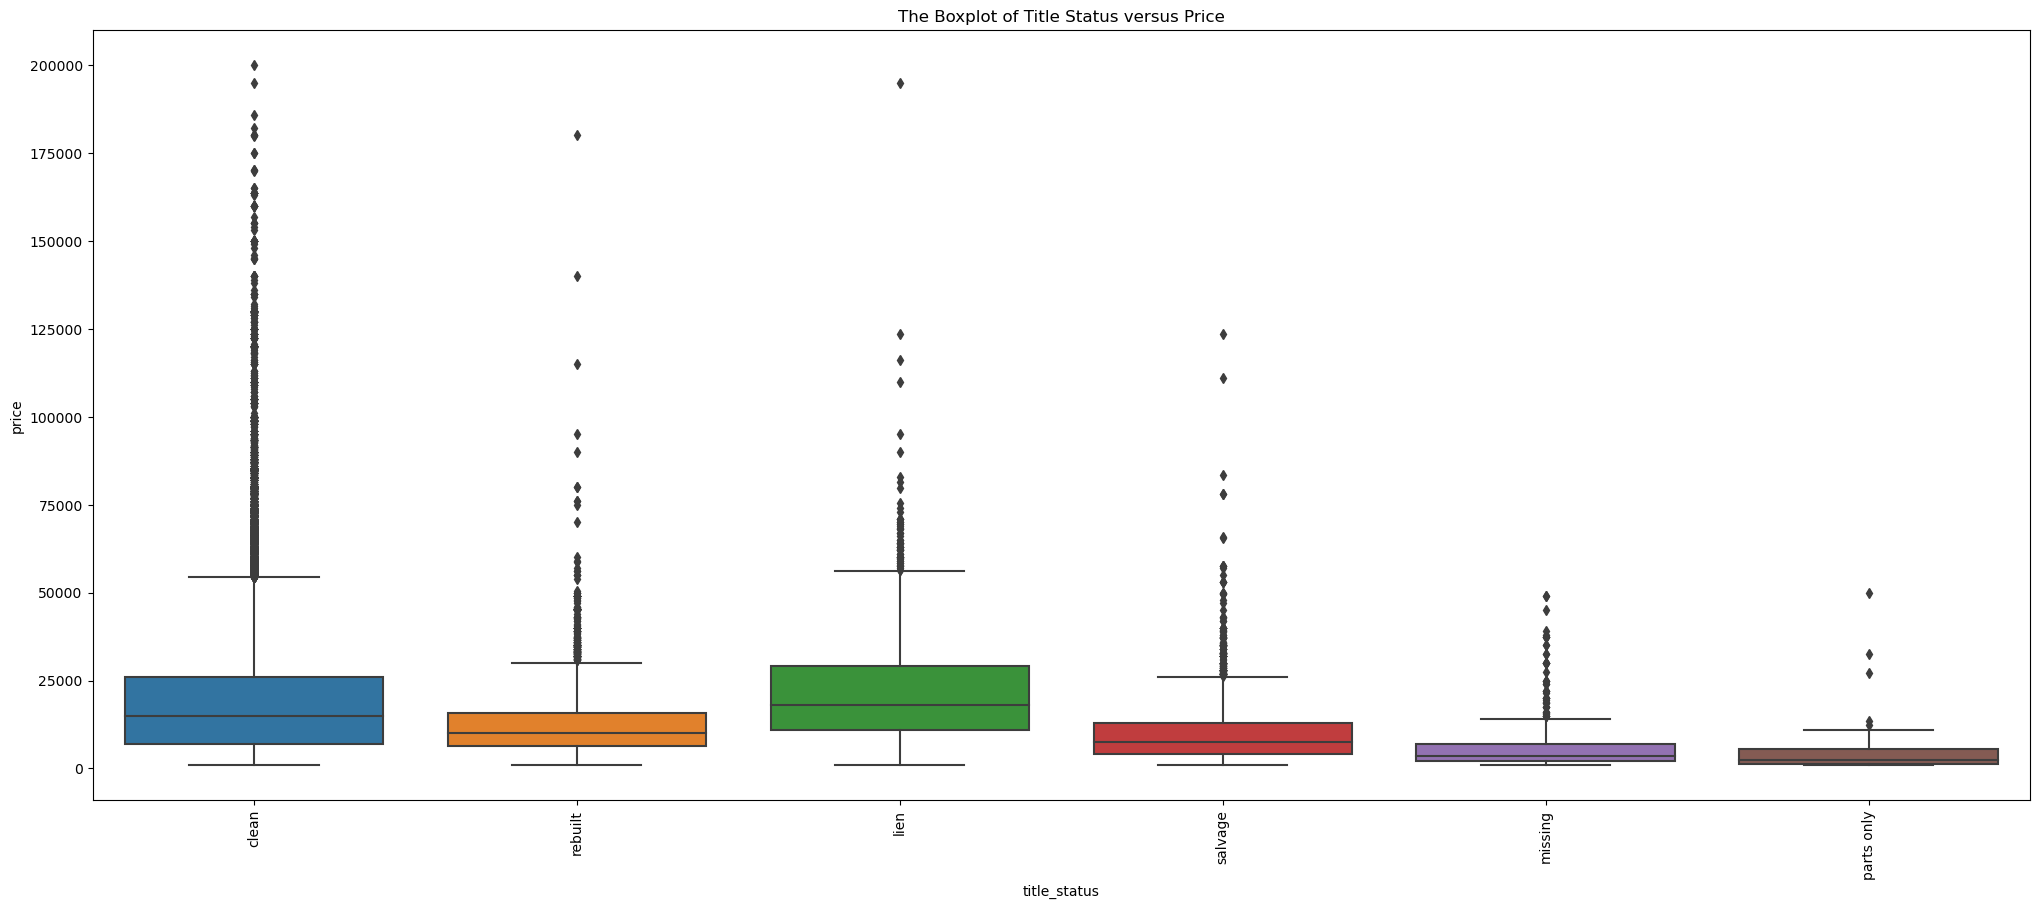

In [67]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='title_status', y='price')
plt.title("The Boxplot of Title Status versus Price");

In [68]:
# transmission vs price 

df['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


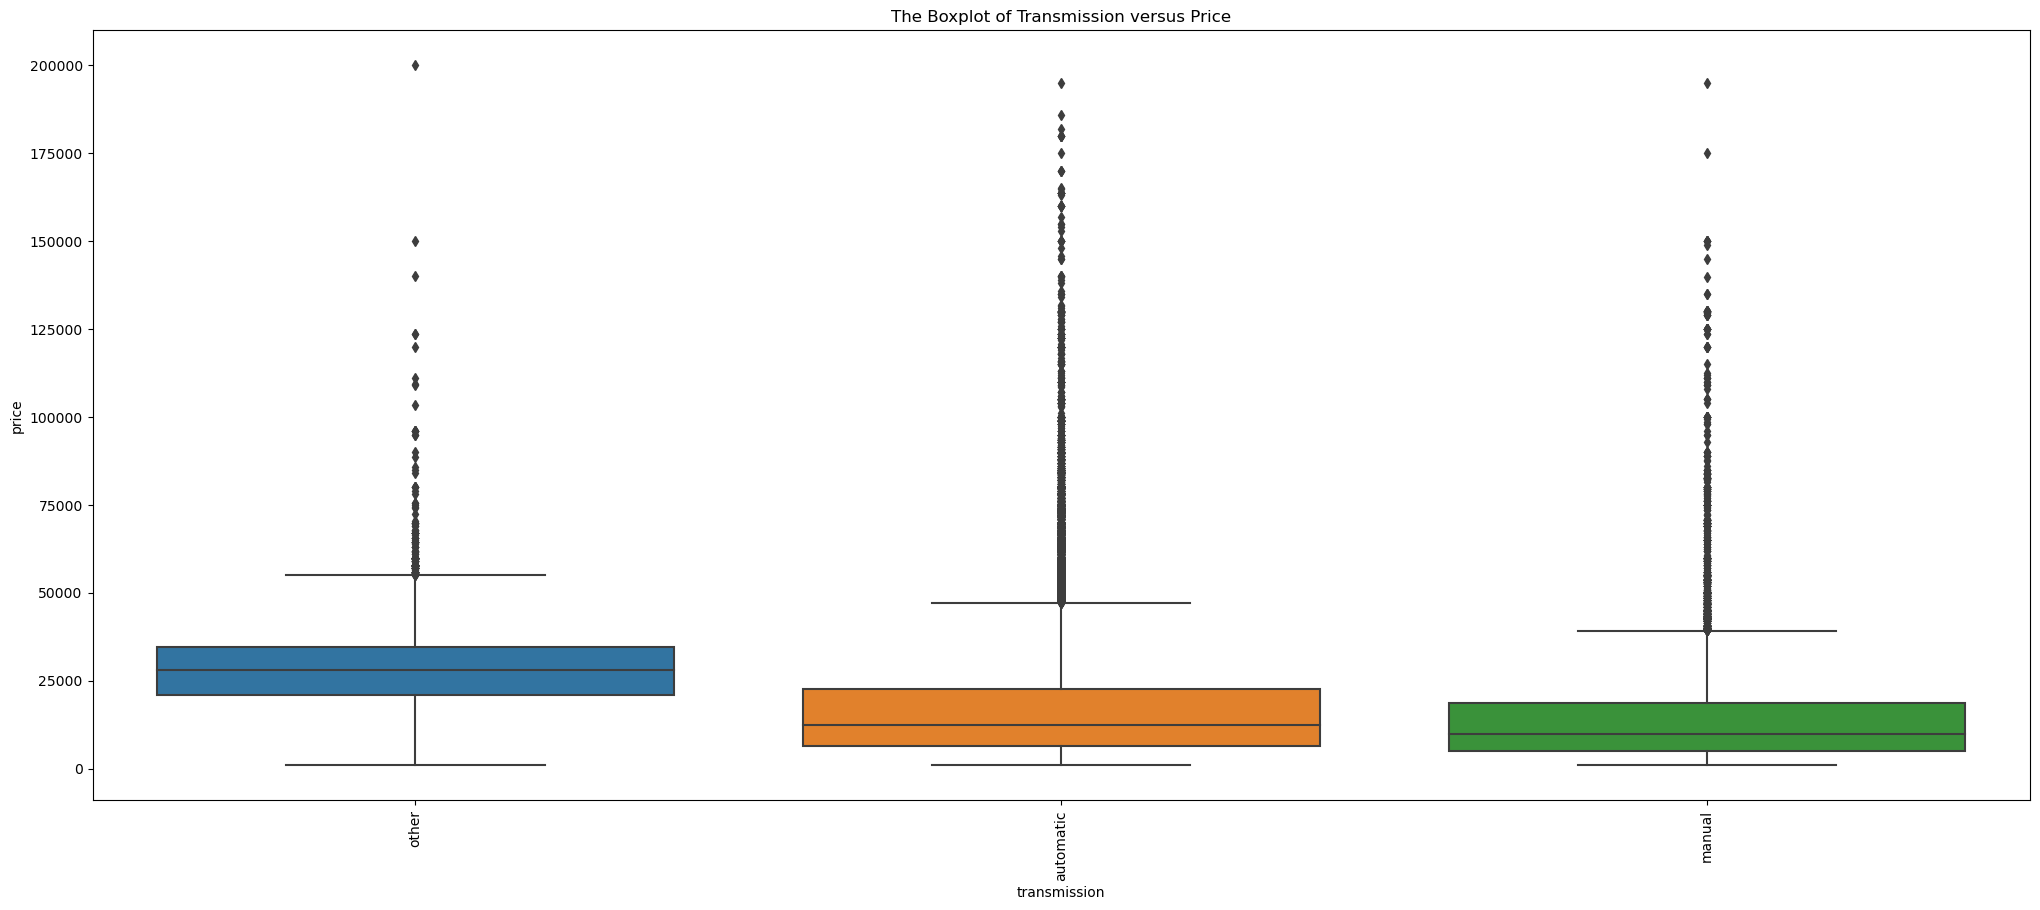

In [69]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='transmission', y='price')
plt.title("The Boxplot of Transmission versus Price");

In [70]:
# drive vs price

df['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


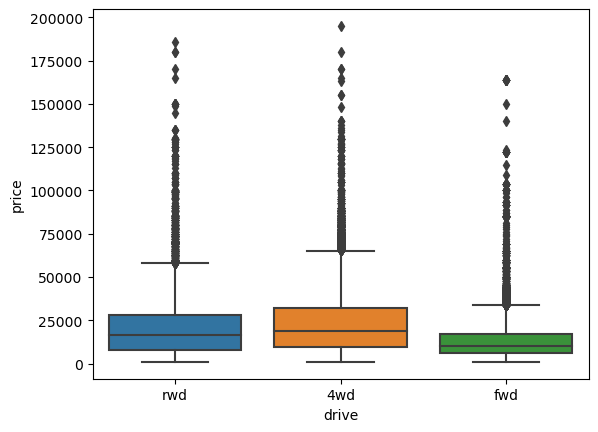

In [71]:
sns.boxplot(x=df["drive"], y =df["price"]);

In [72]:
df.isnull().mean()

price           0.000000
year            0.000012
manufacturer    0.000000
condition       0.354789
cylinders       0.378980
fuel            0.005152
odometer        0.004167
title_status    0.013100
transmission    0.004348
drive           0.287206
size            0.677605
type            0.223449
paint_color     0.273604
state           0.000000
dtype: float64

In [73]:
# size vs price

df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


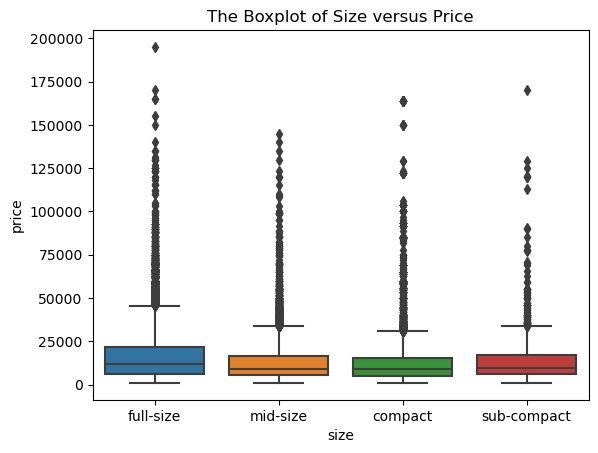

In [74]:
sns.boxplot(df, x='size', y='price')
plt.title("The Boxplot of Size versus Price");

In [75]:
# type vs price

df['type'].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


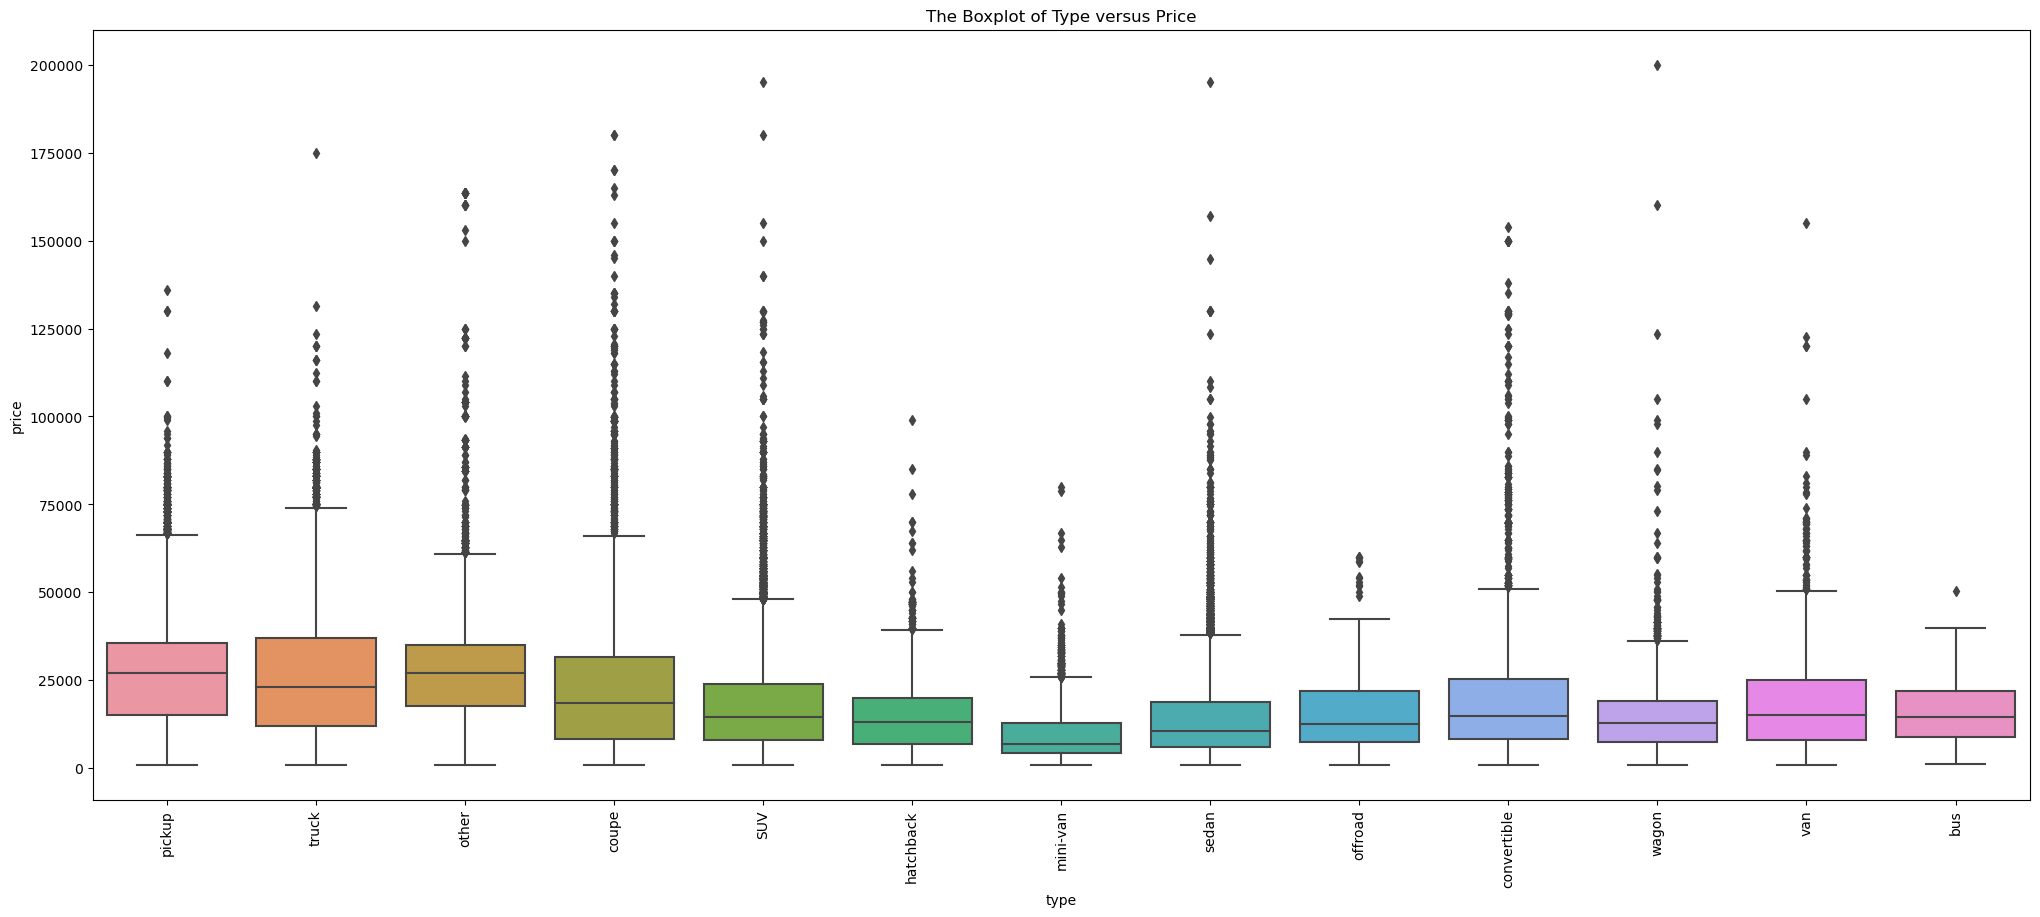

In [76]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='type', y='price')
plt.title("The Boxplot of Type versus Price");

In [77]:
# paint color vs price

df['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


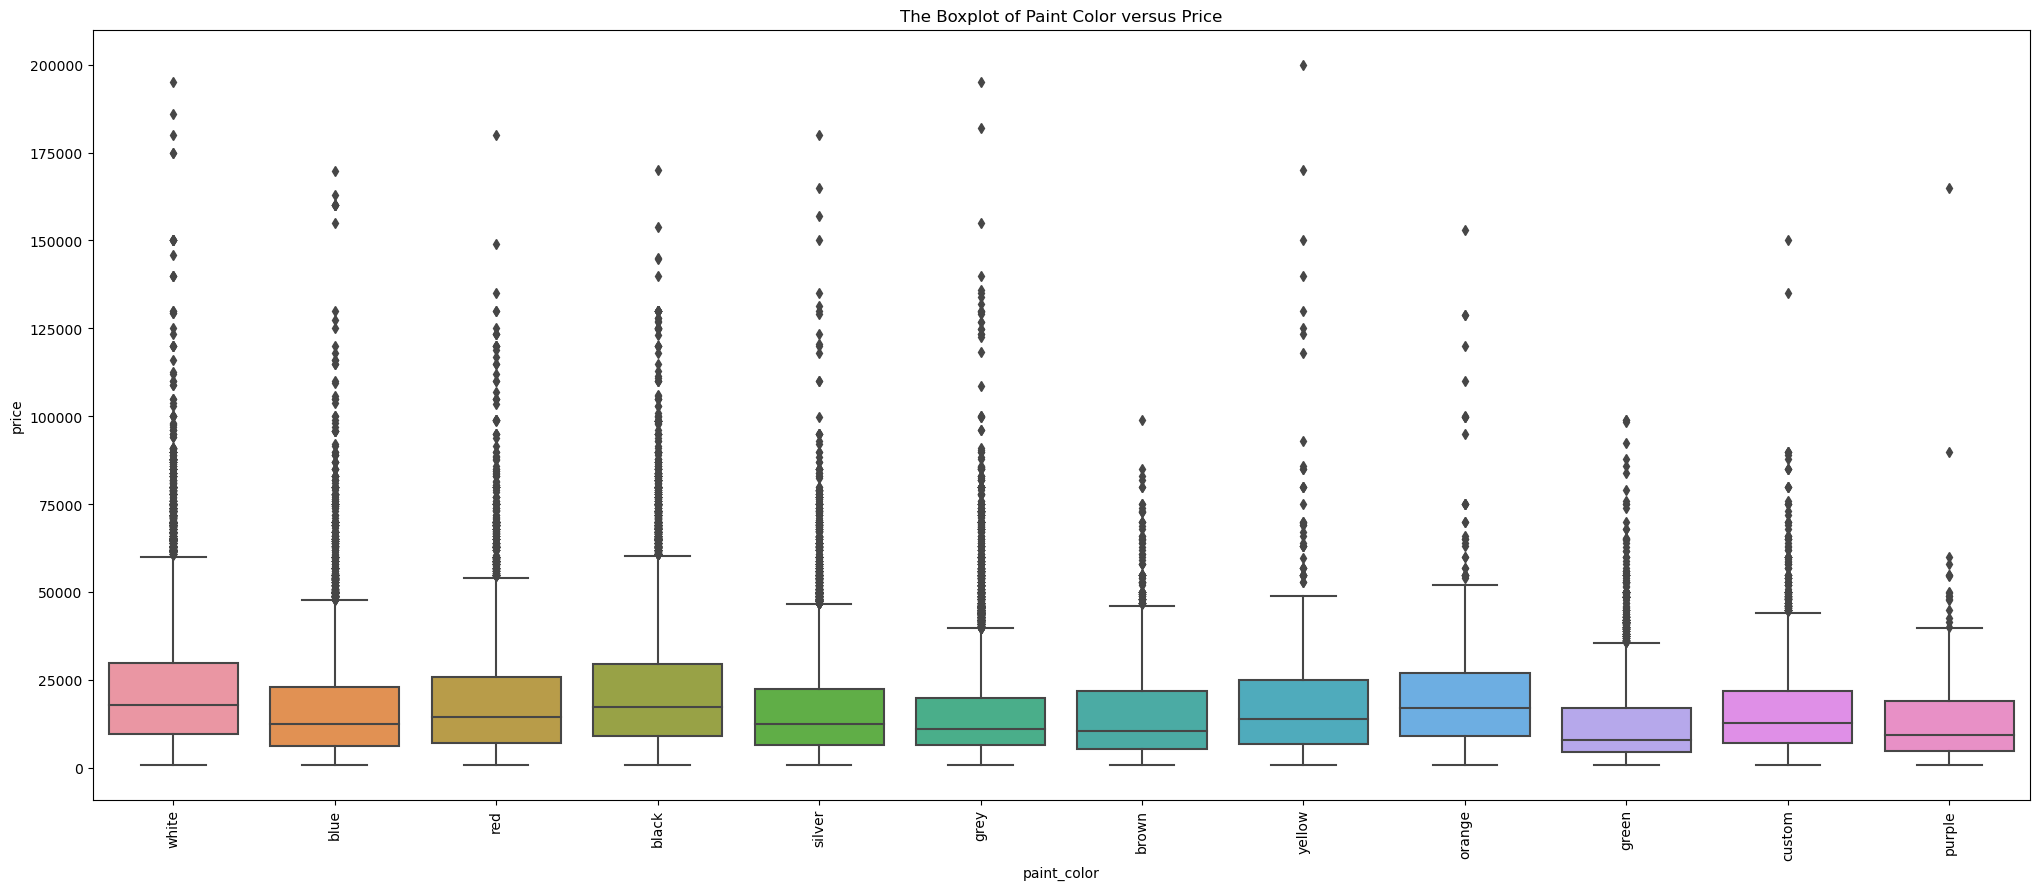

In [78]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='paint_color', y='price')
plt.title('The Boxplot of Paint Color versus Price');

In [79]:
df['paint_color'].mode()

0    white
Name: paint_color, dtype: object

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


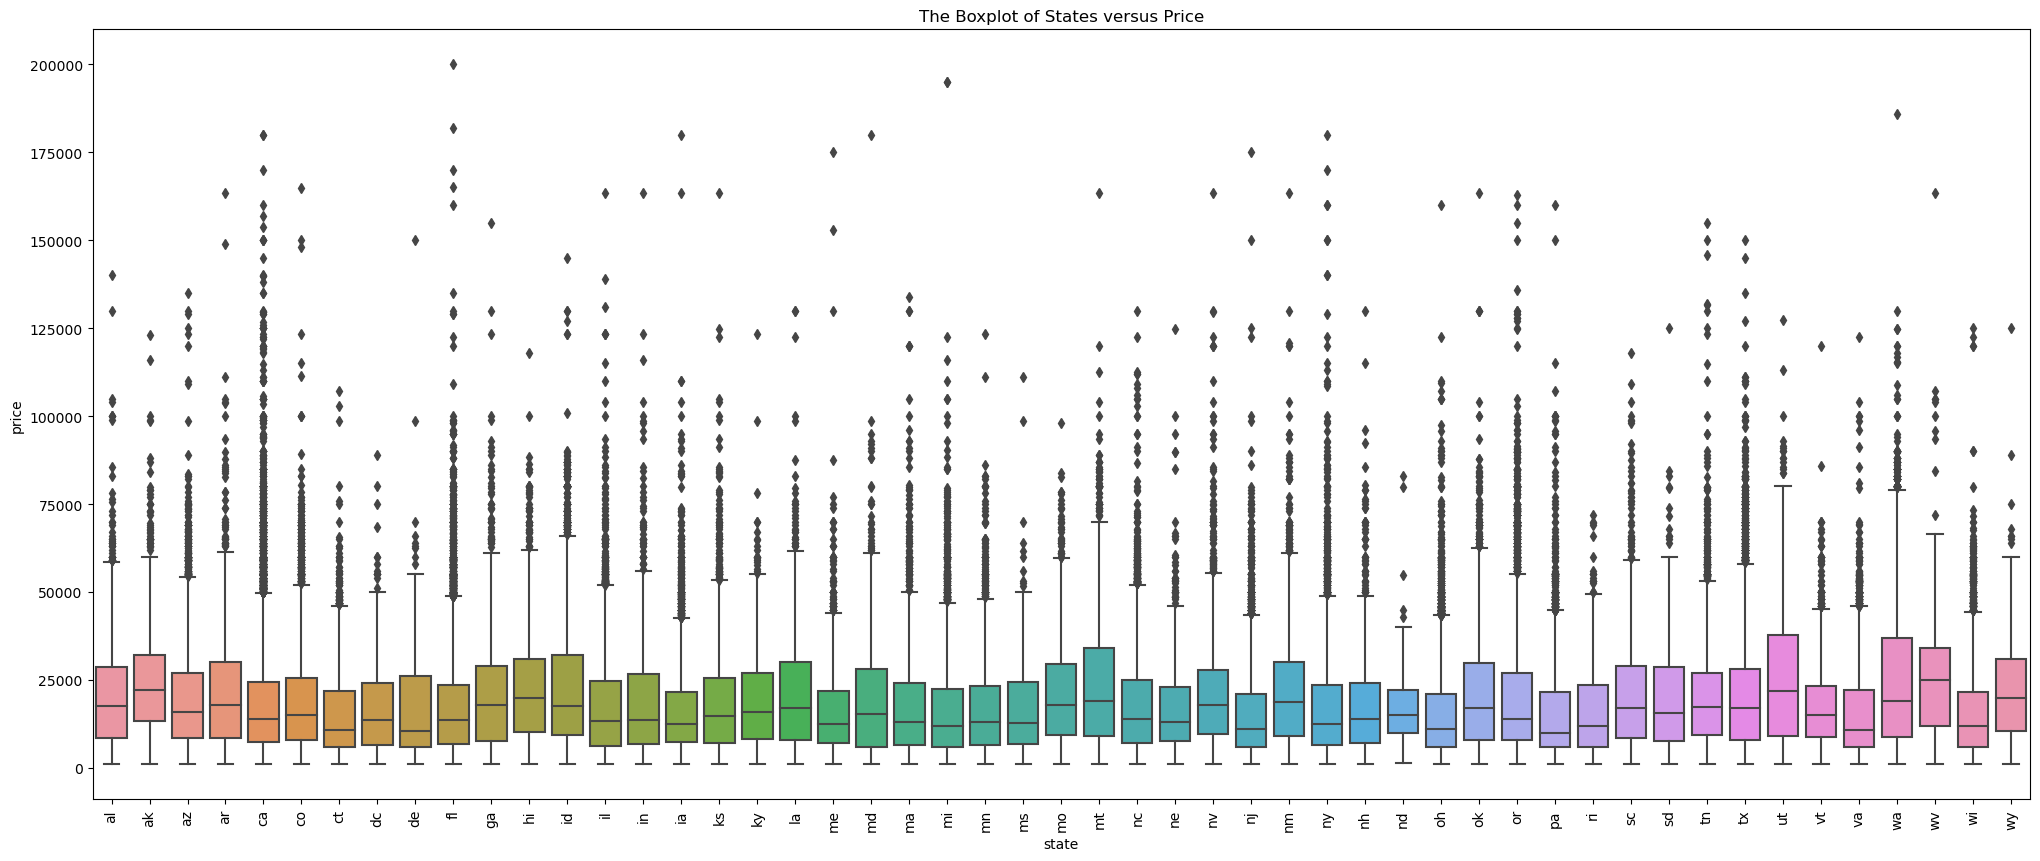

In [80]:
# states vs price

plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='state', y='price')
plt.title("The Boxplot of States versus Price");

In [81]:
df.isnull().sum()

price                0
year                 3
manufacturer         0
condition        91869
cylinders        98133
fuel              1334
odometer          1079
title_status      3392
transmission      1126
drive            74369
size            175459
type             57860
paint_color      70847
state                0
dtype: int64

In [82]:
df.shape

(258940, 14)

In [83]:
#look at the missing value of year 

df[df['year'].isna()]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2746,71989.0,NaN,land rover,NaN,6 cylinders,gas,41865.0,clean,automatic,4wd,NaN,SUV,grey,al
250813,34888.0,NaN,land rover,NaN,4 cylinders,gas,40418.0,clean,automatic,4wd,NaN,SUV,black,nj
359095,71989.0,NaN,land rover,NaN,6 cylinders,gas,41865.0,clean,automatic,4wd,NaN,SUV,grey,tn


In [84]:
# save the dataframe after cleaning to imputing

df.to_csv('data/df_imputing.csv', index=False)